# Credit EDA Case Study 

In [1]:
#import the warnings.
import  warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [6]:
# Read the Application Data in to a dataframe df 
df=pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Getting the Shape of Dataframe 
print ('Data Frame Shape ',df.shape)

Data Frame Shape  (307511, 122)


### Data Frame is Having 122 columns and  307511  Rows 


### Data Cleaning 

## Handling Missing Values

In [8]:
# If a column contains more than 40% of its values not there,# delete tha columns
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing[percent_missing>40])
Missing40percentcolumns=percent_missing[percent_missing>40].index.tolist()

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [9]:
# Dropping the columns with null Values More than 40 Percent as it does not add value for Analysis 
df1=df.drop(Missing40percentcolumns,axis=1)
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df1.shape

(307511, 73)

###  Data Frame is now having 73 columns and 307511 Rows

In [216]:
# Recalculating the Missing Counts 
missing_counts = df1.isnull().sum()
missing_counts[missing_counts!=0].sort_values(ascending=False)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
dtype: int64

In [217]:
# Recalculating the Missing percentages 
missing_df = df1.isnull().sum() * 100 / len(df1)
missing_df[missing_df!=0].sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [218]:
# Function Handle to Analyse the Numerical Columns 
def Numerical_analysis(dataframe,colName,nbins=10):
    print('Analaysis for Column Name ',colName)
    print('NUll Value Count',dataframe[colName].isna().sum())
    print('Describe\n',dataframe[colName].describe())
    colData=dataframe[colName]
    colDataNan=colData[~np.isnan(colData)] # Remove the NaNs

    sns.distplot(colDataNan,hist=True,kde=False,bins=nbins);
    

In [219]:
# Function Handle to Analyse the Categorical Columns
def Categorical_analysis(dataframe,colName):
    print('Analaysis for Column Name ',colName)
    print('NUll Value Count',dataframe[colName].isna().sum())    
    print('Mode ',dataframe[colName].mode())
    print('Value Counts\n',dataframe[colName].value_counts())

    colData=dataframe[colName]
    colDataNan=colData[~(colData=='nan')] # Remove the NaNs
    sns.countplot(x=colDataNan,data=df1);
    plt.xticks(rotation=90);

Analaysis for Column Name  OCCUPATION_TYPE
NUll Value Count 96391
Mode  0    Laborers
dtype: object
Value Counts
 Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


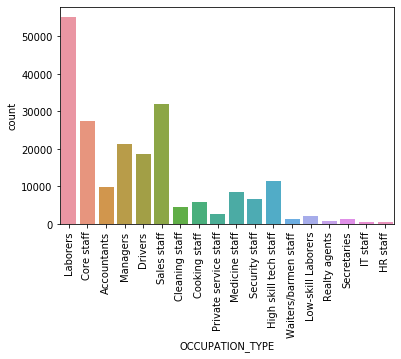

In [220]:
# Analyse the Categorical column OCCUPATION_TYPE
Categorical_analysis(df1,'OCCUPATION_TYPE')

### Inference : The Null value Count for OCCUPATION_TYPE is 96391 and around 31 percent values are missing . We need to impute this missing values by adding a new class 'Not Defined' as imputing with mode or any other value may lead to incorrect analyses 

Analaysis for Column Name  OCCUPATION_TYPE
NUll Value Count 0
Mode  0    Not Defined
dtype: object
Value Counts
 Not Defined              96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


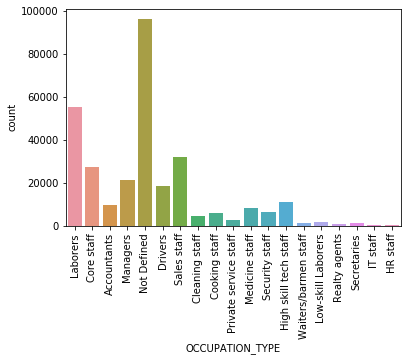

In [221]:

# Impute the missing Values for the Categorical column OCCUPATION_TYPE with  a new class 'Not Defined'
df1['OCCUPATION_TYPE'].fillna('Not Defined',inplace=True)
Categorical_analysis(df1,'OCCUPATION_TYPE')

Analaysis for Column Name  EXT_SOURCE_3
NUll Value Count 60965
Describe
 count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


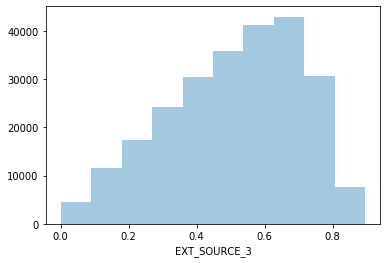

In [222]:
# Analyse the numerical column EXT_SOURCE_3
Numerical_analysis(df1,'EXT_SOURCE_3',10)

### Inference : The Column EXT_Source_3 has a Null Value count of 60965 and missing percent is around 19.8% . So imputing  the mssing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  EXT_SOURCE_3
NUll Value Count 0
Describe
 count    307511.000000
mean          0.510853
std           0.174464
min           0.000527
25%           0.417100
50%           0.510853
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


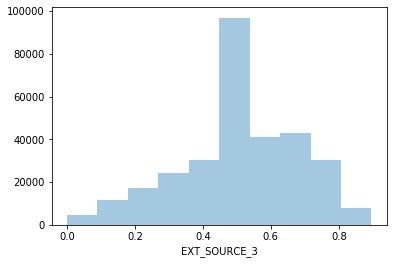

In [223]:
# imputing  the missing values for EXT_SOURCE_3 with Mean of the distribution
df1['EXT_SOURCE_3'].fillna(df1['EXT_SOURCE_3'].mean(),inplace=True)
Numerical_analysis(df1,'EXT_SOURCE_3',10)

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_YEAR
NUll Value Count 41519
Describe
 count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


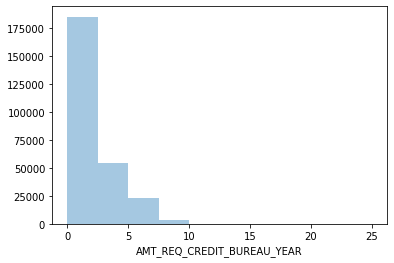

In [224]:
# Analyse the Numerical column AMT_REQ_CREDIT_BUREAU_YEAR
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_YEAR',10)


### Inference : The Column AMT_REQ_CREDIT_BUREAU_YEAR has a Null Value count of 41519 and missing percent is around 13.5% . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_YEAR
NUll Value Count 0
Describe
 count    307511.000000
mean          1.899974
std           1.738528
min           0.000000
25%           1.000000
50%           1.899974
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


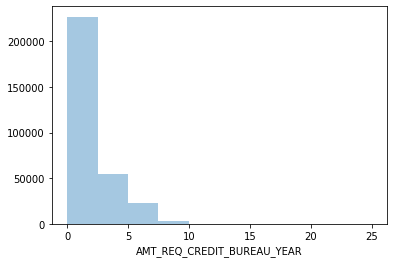

In [225]:
# imputing  the missing values for AMT_REQ_CREDIT_BUREAU_YEAR with Mean of the distribution
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df1['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(),inplace=True)
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_YEAR',10)

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_MON
NUll Value Count 41519
Describe
 count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


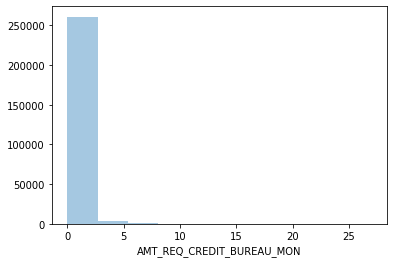

In [226]:
# Analyse the Numerical column AMT_REQ_CREDIT_BUREAU_MON
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_MON',10)

### Inference : The Column AMT_REQ_CREDIT_BUREAU_MON has a Null Value count of 41519 and missing percent is around 13.5% . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_MON
NUll Value Count 0
Describe
 count    307511.000000
mean          0.267395
std           0.851923
min           0.000000
25%           0.000000
50%           0.000000
75%           0.267395
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


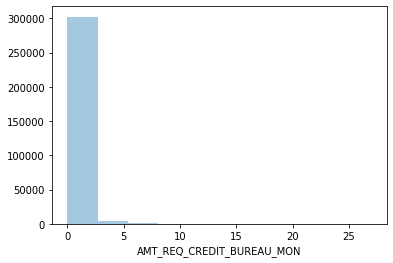

In [227]:
# imputing  the missing values for AMT_REQ_CREDIT_BUREAU_MON with Mean of the distribution
df1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df1['AMT_REQ_CREDIT_BUREAU_MON'].mean(),inplace=True)
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_MON',10)

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_WEEK
NUll Value Count 41519
Describe
 count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


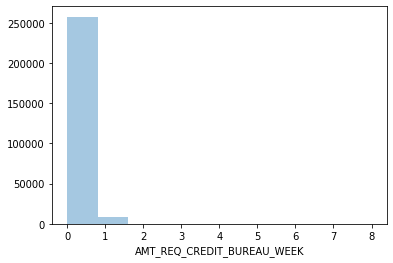

In [228]:
# Analyse the Numerical column AMT_REQ_CREDIT_BUREAU_WEEK
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_WEEK',10)

### Inference : The Column AMT_REQ_CREDIT_BUREAU_WEEK has a Null Value count of 41519 and missing percent is around 13.5% . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 


Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_WEEK
NUll Value Count 0
Describe
 count    307511.000000
mean          0.034362
std           0.190366
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


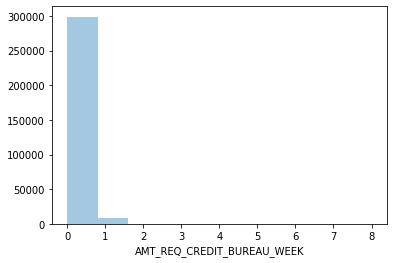

In [229]:
# imputing  the missing values for AMT_REQ_CREDIT_BUREAU_WEEK with Mean of the distribution
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df1['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(),inplace=True)
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_WEEK',10)

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_DAY
NUll Value Count 41519
Describe
 count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


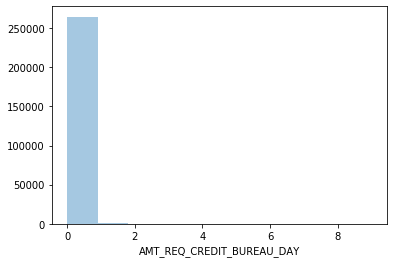

In [230]:
# Analyse the Numerical column AMT_REQ_CREDIT_BUREAU_DAY
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_DAY',10)

### Inference : The Column AMT_REQ_CREDIT_BUREAU_DAY has a Null Value count of 41519 and missing percent is around 13.5% . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_DAY
NUll Value Count 0
Describe
 count    307511.000000
mean          0.007000
std           0.103009
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


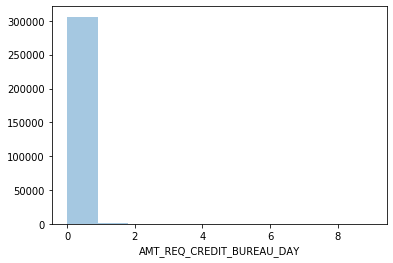

In [231]:
# imputing  the missing values for AMT_REQ_CREDIT_BUREAU_DAY with Mean of the distribution
df1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df1['AMT_REQ_CREDIT_BUREAU_DAY'].mean(),inplace=True)
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_DAY',10)

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_HOUR
NUll Value Count 41519
Describe
 count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


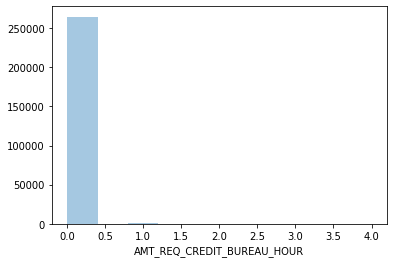

In [232]:
# Analyse the Numerical column AMT_REQ_CREDIT_BUREAU_HOUR
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_HOUR',10)

### Inference : The Column AMT_REQ_CREDIT_BUREAU_HOUR has a Null Value count of 41519 and missing percent is around 13.5% . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_HOUR
NUll Value Count 0
Describe
 count    307511.000000
mean          0.006402
std           0.077983
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


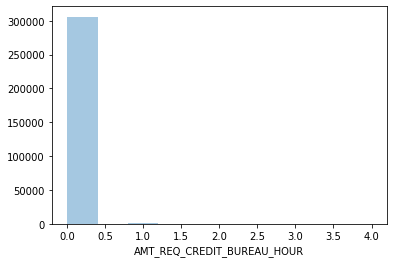

In [233]:
# imputing  the missing values for AMT_REQ_CREDIT_BUREAU_HOUR with Mean of the distribution
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df1['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(),inplace=True)
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_HOUR',10)

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_QRT
NUll Value Count 41519
Describe
 count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


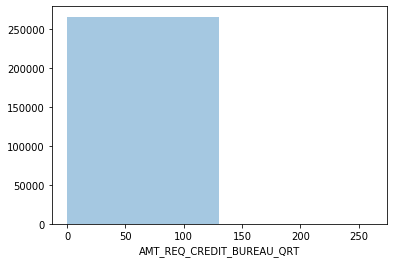

In [234]:
# Analyse the Numerical column AMT_REQ_CREDIT_BUREAU_QRT
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_QRT',2)

### Inference :  The Column AMT_REQ_CREDIT_BUREAU_QRT has a Null Value count of 41519 and missing percent is around 13.5% . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 


Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_QRT
NUll Value Count 0
Describe
 count    307511.000000
mean          0.265474
std           0.738507
min           0.000000
25%           0.000000
50%           0.000000
75%           0.265474
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


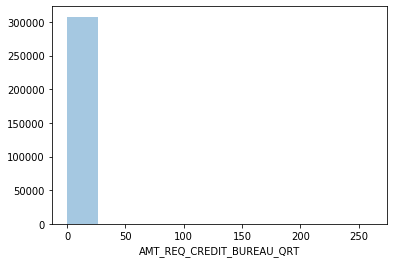

In [235]:
# imputing  the missing values for AMT_REQ_CREDIT_BUREAU_QRT with Mean of the distribution
df1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df1['AMT_REQ_CREDIT_BUREAU_QRT'].mean(),inplace=True)
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_QRT',10)

Analaysis for Column Name  OBS_30_CNT_SOCIAL_CIRCLE
NUll Value Count 1021
Describe
 count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


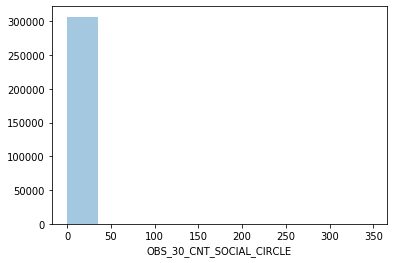

In [236]:
# Analyse the Numerical column OBS_30_CNT_SOCIAL_CIRCLE
Numerical_analysis(df1,'OBS_30_CNT_SOCIAL_CIRCLE',10)

### Inference : The Column OBS_30_CNT_SOCIAL_CIRCLE has a Null Value count of 1021 and missing percent is around 0.332021 . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  OBS_30_CNT_SOCIAL_CIRCLE
NUll Value Count 0
Describe
 count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


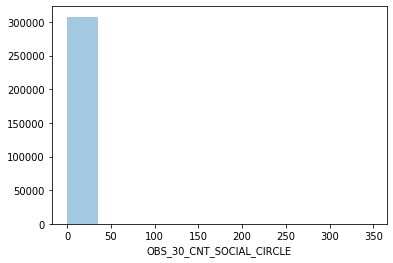

In [237]:
# imputing  the missing values for OBS_30_CNT_SOCIAL_CIRCLE with Mean of the distribution
df1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df1['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
Numerical_analysis(df1,'OBS_30_CNT_SOCIAL_CIRCLE',10)

Analaysis for Column Name  DEF_30_CNT_SOCIAL_CIRCLE
NUll Value Count 1021
Describe
 count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


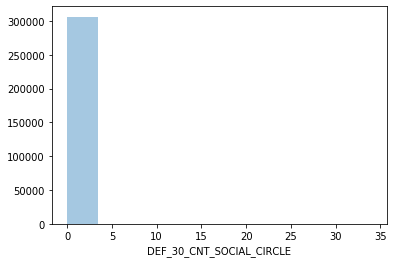

In [238]:
# Analyse the Numerical column DEF_30_CNT_SOCIAL_CIRCLE
Numerical_analysis(df1,'DEF_30_CNT_SOCIAL_CIRCLE',10)

### Inference : The Column DEF_30_CNT_SOCIAL_CIRCLE has a Null Value count of 1021 and missing percent is around 0.332021 . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 


Analaysis for Column Name  DEF_30_CNT_SOCIAL_CIRCLE
NUll Value Count 0
Describe
 count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


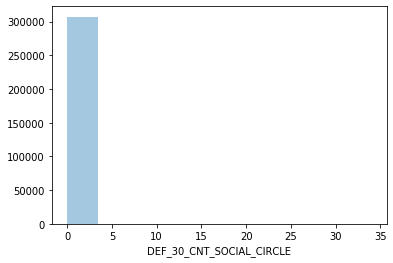

In [239]:
# imputing  the missing values for DEF_30_CNT_SOCIAL_CIRCLE with Mean of the distribution
df1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df1['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
Numerical_analysis(df1,'DEF_30_CNT_SOCIAL_CIRCLE',10)

Analaysis for Column Name  OBS_60_CNT_SOCIAL_CIRCLE
NUll Value Count 1021
Describe
 count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


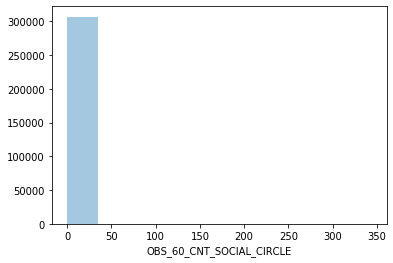

In [240]:
# Analyse the Numerical column OBS_60_CNT_SOCIAL_CIRCLE
Numerical_analysis(df1,'OBS_60_CNT_SOCIAL_CIRCLE',10)

### Inference :  The Column OBS_60_CNT_SOCIAL_CIRCLE has a Null Value count of 1021 and missing percent is around 0.332021 . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  OBS_60_CNT_SOCIAL_CIRCLE
NUll Value Count 0
Describe
 count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


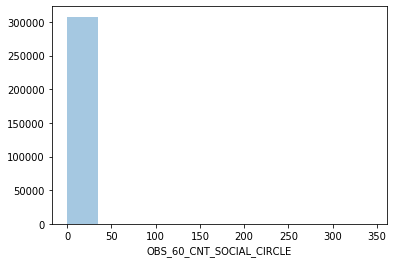

In [241]:
# imputing  the missing values for OBS_60_CNT_SOCIAL_CIRCLE with Mean of the distribution
df1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df1['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
Numerical_analysis(df1,'OBS_60_CNT_SOCIAL_CIRCLE',10)

Analaysis for Column Name  DEF_60_CNT_SOCIAL_CIRCLE
NUll Value Count 1021
Describe
 count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


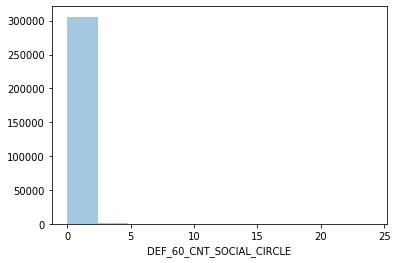

In [242]:
# Analyse the Numerical column DEF_60_CNT_SOCIAL_CIRCLE
Numerical_analysis(df1,'DEF_60_CNT_SOCIAL_CIRCLE',10)

### Inference : The Column DEF_60_CNT_SOCIAL_CIRCLEhas a Null Value count of 1021 and missing percent is around 0.332021 . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 


Analaysis for Column Name  DEF_60_CNT_SOCIAL_CIRCLE
NUll Value Count 0
Describe
 count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


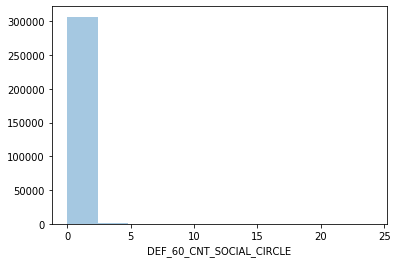

In [243]:
# imputing  the missing values for DEF_60_CNT_SOCIAL_CIRCLE with Mean of the distribution
df1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df1['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
Numerical_analysis(df1,'DEF_60_CNT_SOCIAL_CIRCLE',10)

Analaysis for Column Name  EXT_SOURCE_2
NUll Value Count 660
Describe
 count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


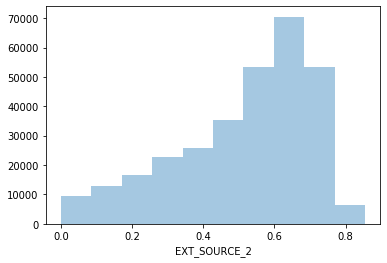

In [244]:
# Analyse the Numerical column EXT_SOURCE_2
Numerical_analysis(df1,'EXT_SOURCE_2',10)

### Inference : The Column EXT_SOURCE_2 has a Null Value count of 660 and missing percent is around 0.332021 . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  EXT_SOURCE_2
NUll Value Count 0
Describe
 count    3.075110e+05
mean     5.139023e-01
std      1.911477e-01
min      8.173617e-08
25%      3.907824e-01
50%      5.654672e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


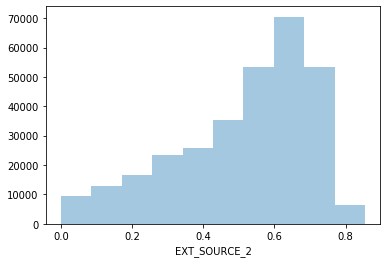

In [245]:
# imputing  the missing values for EXT_SOURCE_2 with Mean of the distribution
df1['EXT_SOURCE_2'].fillna(df1['EXT_SOURCE_2'].mode()[0],inplace=True)
Numerical_analysis(df1,'EXT_SOURCE_2',10)

Analaysis for Column Name  AMT_GOODS_PRICE
NUll Value Count 278
Describe
 count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


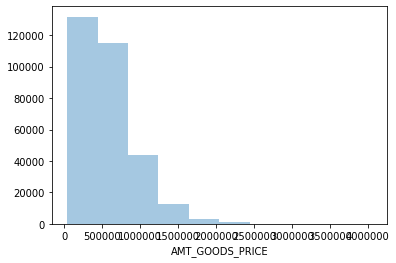

In [246]:
# Analyse the Numerical column AMT_GOODS_PRICE
Numerical_analysis(df1,'AMT_GOODS_PRICE',10)

### Inference : The Column AMT_GOODS_PRICE has a Null Value count of 278 and missing percent is around 0.332021 . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  AMT_GOODS_PRICE
NUll Value Count 0
Describe
 count    3.075110e+05
mean     5.383962e+05
std      3.692794e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


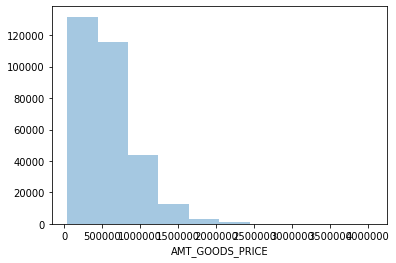

In [247]:
# imputing  the missing values for AMT_GOODS_PRICE with Mean of the distribution
df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].mean(),inplace=True)
Numerical_analysis(df1,'AMT_GOODS_PRICE',10)

Analaysis for Column Name  AMT_ANNUITY
NUll Value Count 12
Describe
 count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


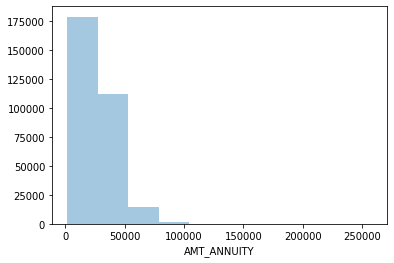

In [248]:
# Analyse the Numerical column AMT_ANNUITY
Numerical_analysis(df1,'AMT_ANNUITY',10)

### Inference : The Column AMT_ANNUITY has a Null Value count of 278 and missing percent is around 0.332021 . So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  AMT_GOODS_PRICE
NUll Value Count 0
Describe
 count    3.075110e+05
mean     5.383962e+05
std      3.692794e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


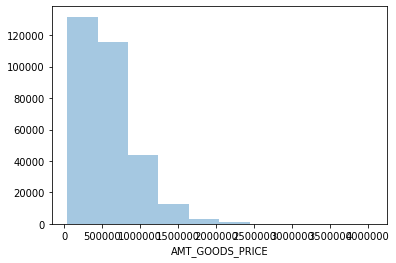

In [249]:
# imputing  the missing values for AMT_ANNUITY with Mean of the distribution
df1['AMT_ANNUITY'].fillna(df1['AMT_ANNUITY'].median(),inplace=True)
Numerical_analysis(df1,'AMT_GOODS_PRICE',10)

Analaysis for Column Name  CNT_FAM_MEMBERS
NUll Value Count 2
Mode  0    2.0
dtype: float64
Value Counts
 2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64


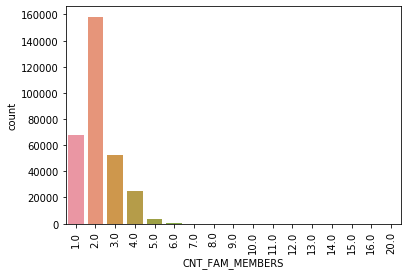

In [250]:
# Analyse the column CNT_FAM_MEMBERS
Categorical_analysis(df1,'CNT_FAM_MEMBERS')

### Inference : The Column CNT_FAM_MEMBERS  has a Null Value count of 2 . So imputing  the missing values with mode of the distribution would be ideal as the number of mising values is less and it would not impact the  distribution 

Analaysis for Column Name  CNT_FAM_MEMBERS
NUll Value Count 0
Mode  0    2.0
dtype: float64
Value Counts
 2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64


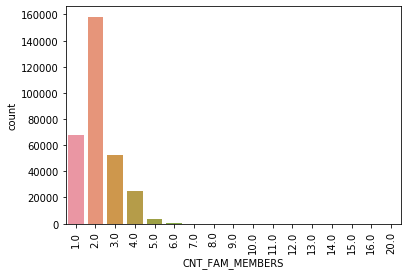

In [251]:
# imputing the missing values with mode of the distribution
df1['CNT_FAM_MEMBERS'].fillna(df1['CNT_FAM_MEMBERS'].mode().iloc[0],inplace=True)
Categorical_analysis(df1,'CNT_FAM_MEMBERS')

Analaysis for Column Name  DAYS_LAST_PHONE_CHANGE
NUll Value Count 1
Describe
 count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


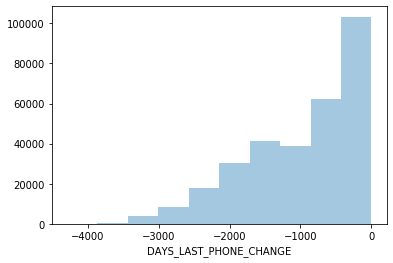

In [252]:
# Analyse the Numerical column DAYS_LAST_PHONE_CHANGE
Numerical_analysis(df1,'DAYS_LAST_PHONE_CHANGE',10)

### Inference :  The Column DAYS_LAST_PHONE_CHANGE  has a Null Value count of 1. So imputing  the missing values with Mean of the distribution would be ideal as it would not impact the Mean of the distribution 

Analaysis for Column Name  DAYS_LAST_PHONE_CHANGE
NUll Value Count 0
Describe
 count    307511.000000
mean       -962.858788
std         826.807143
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


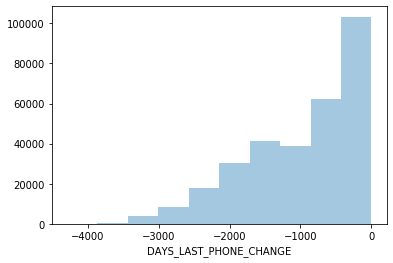

In [253]:
# imputing  the missing values for DAYS_LAST_PHONE_CHANGE with Mean of the distribution
df1['DAYS_LAST_PHONE_CHANGE'].fillna(df1['DAYS_LAST_PHONE_CHANGE'].mean(),inplace=True)
Numerical_analysis(df1,'DAYS_LAST_PHONE_CHANGE',10)

Analaysis for Column Name  NAME_TYPE_SUITE
NUll Value Count 1292
Mode  0    Unaccompanied
dtype: object
Value Counts
 Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


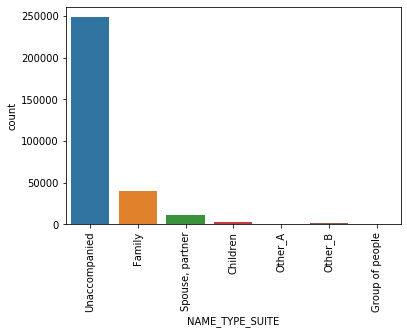

In [254]:
# Analyse the Categorical column NAME_TYPE_SUITE
Categorical_analysis(df1, "NAME_TYPE_SUITE")

### Inference :  The Column NAME_TYPE_SUITE has a Null Value count of 1292 and missing percent is around 0.332021 . So imputing  the missing values with mode of the distribution would be ideal as the percentage missing values is Less 

Analaysis for Column Name  NAME_TYPE_SUITE
NUll Value Count 0
Mode  0    Unaccompanied
dtype: object
Value Counts
 Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


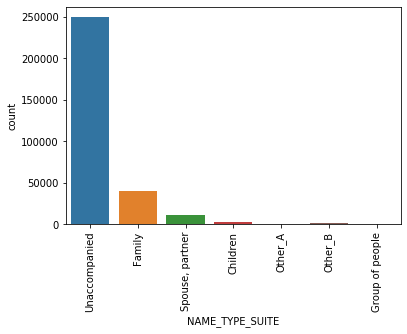

In [255]:
# imputing  the missing values for NAME_TYPE_SUITE with Mode of the distribution
df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].mode()[0],inplace=True)
Categorical_analysis(df1, "NAME_TYPE_SUITE")

In [256]:
# Recalculating the Missing percentages 
missing_df = df1.isnull().sum() * 100 / len(df1)
missing_df[missing_df!=0].sort_values(ascending=False)

Series([], dtype: float64)

### All the Missing Values are Handled 

In [257]:
df1.shape

(307511, 73)

In [258]:
# Remove the Not Required Columns 

Remove_cols =['REGION_POPULATION_RELATIVE','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [259]:
df1.drop(labels=Remove_cols,axis=1,inplace=True)


In [260]:
df1.shape

(307511, 46)

#  Standardizing Columns   

In [261]:
flagcols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

In [262]:
#converting flagcols to Categorical Values as N,Y from 0,1
for x in flagcols:
     df1.loc[:,x].replace((0, 1), ('N', 'Y'), inplace=True)

In [263]:
df1[flagcols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 12 columns):
FLAG_MOBIL                     307511 non-null object
FLAG_EMP_PHONE                 307511 non-null object
FLAG_WORK_PHONE                307511 non-null object
FLAG_CONT_MOBILE               307511 non-null object
FLAG_PHONE                     307511 non-null object
FLAG_EMAIL                     307511 non-null object
REG_REGION_NOT_LIVE_REGION     307511 non-null object
REG_REGION_NOT_WORK_REGION     307511 non-null object
LIVE_REGION_NOT_WORK_REGION    307511 non-null object
REG_CITY_NOT_LIVE_CITY         307511 non-null object
REG_CITY_NOT_WORK_CITY         307511 non-null object
LIVE_CITY_NOT_WORK_CITY        307511 non-null object
dtypes: object(12)
memory usage: 28.2+ MB


In [264]:
# categorical columns are:
cat_col = list(set(df1.columns) - set(df1.describe().columns))
cat_col

['REG_CITY_NOT_LIVE_CITY',
 'FLAG_PHONE',
 'REG_REGION_NOT_WORK_REGION',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_MOBIL',
 'NAME_HOUSING_TYPE',
 'FLAG_EMP_PHONE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'FLAG_CONT_MOBILE',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'NAME_CONTRACT_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_OWN_CAR']

In [265]:
# Numerical columns:
num_col = df1.describe().columns
num_col_list=num_col.tolist()
num_col_list

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [266]:
num_col_list.remove('SK_ID_CURR')
num_col_list.remove('TARGET')

# Outlier Analysis 

## Numerical Columns 

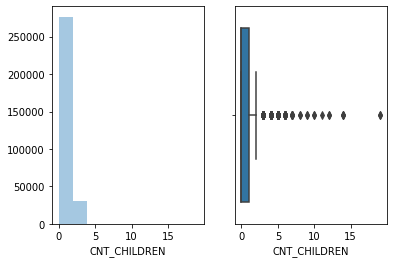

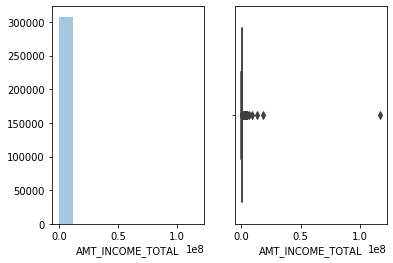

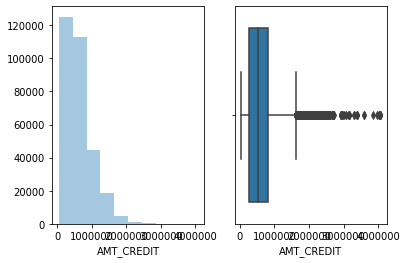

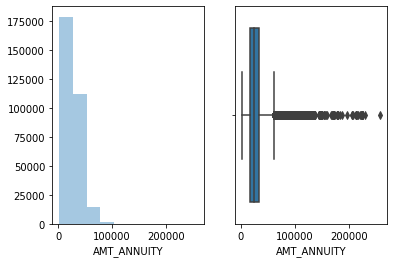

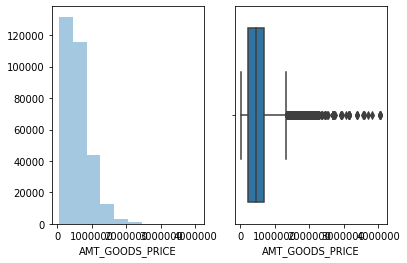

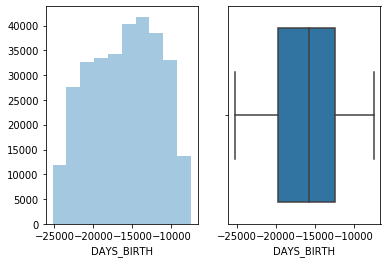

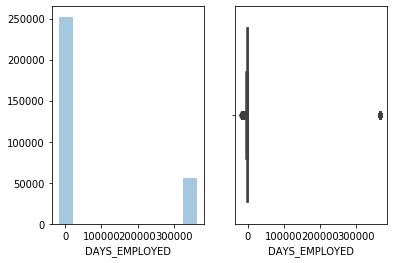

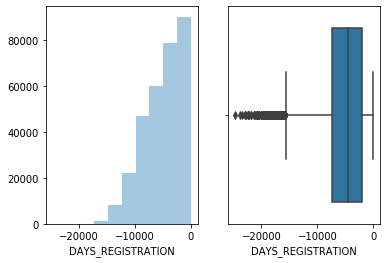

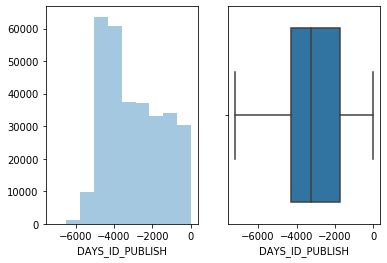

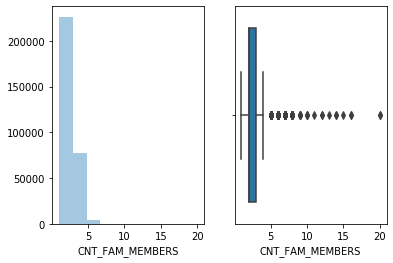

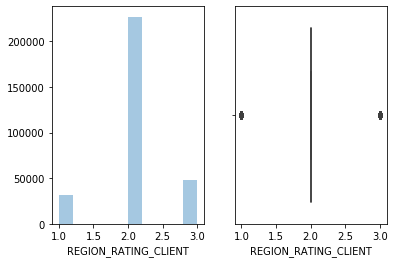

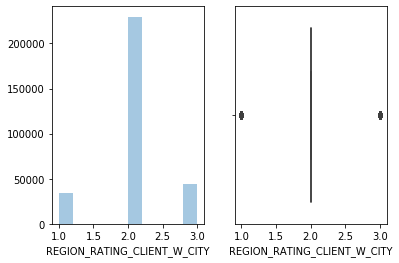

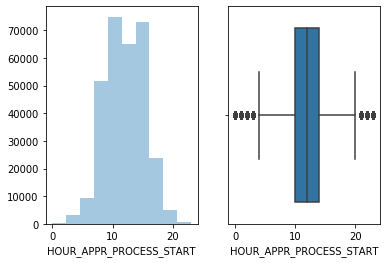

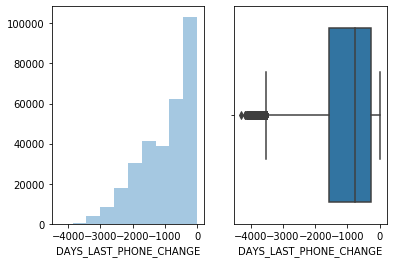

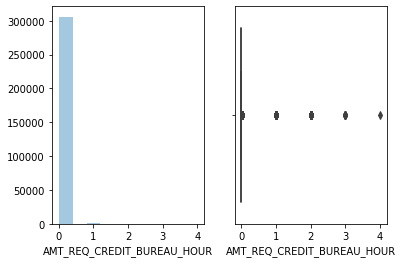

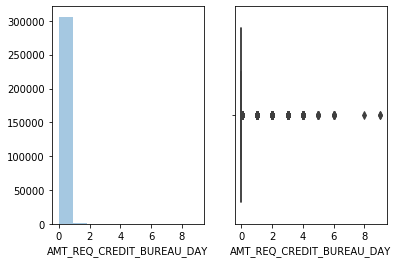

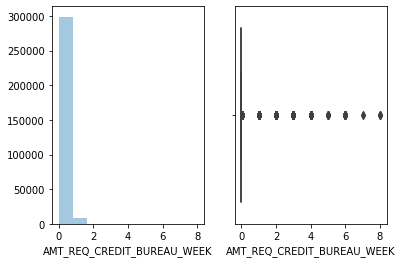

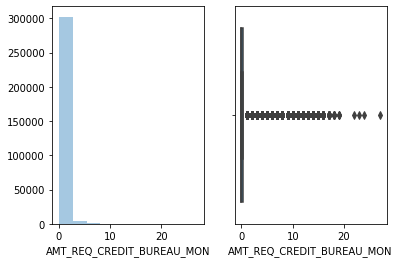

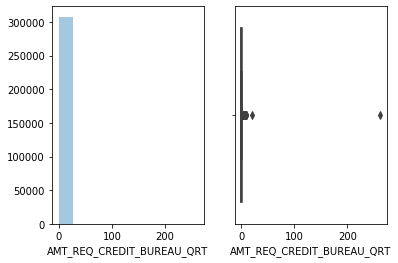

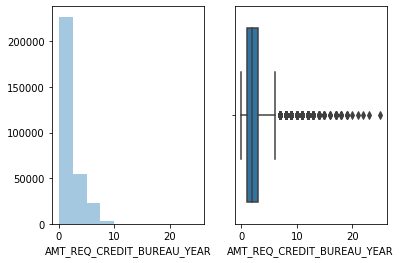

In [267]:
# Printing all the Box plots for Numerical columns
for cols in num_col_list:
    fig, axs = plt.subplots(ncols=2)
    sns.distplot(df1[cols],hist=True,kde=False,bins=10,ax=axs[0]);
    sns.boxplot(x=df1[cols] ,ax=axs[1]);


### Inference :  After observing the above box plots for all the numerical columns the Following columns have outliers  'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED' 'AMT_REQ_CREDIT_BUREAU_QRT'

In [268]:
# Function Handle to Analyse the Numerical Columns  

def Numerical_Outlier_analysis(dataframe,colName):
    print('Analaysis for Column Name ',colName)
    print('Describe\n',dataframe[colName].describe())
    print(dataframe[colName].quantile([.1, .25, .5, .75,0.90, 0.99,1.0]) )
    

In [269]:
# Performing Outlier Analysis for CNT_CHILDREN
Numerical_Outlier_analysis(df1,'CNT_CHILDREN')
df1[df1['CNT_CHILDREN']>=10]['CNT_CHILDREN'].count()

Analaysis for Column Name  CNT_CHILDREN
Describe
 count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
0.10     0.0
0.25     0.0
0.50     0.0
0.75     1.0
0.90     2.0
0.99     3.0
1.00    19.0
Name: CNT_CHILDREN, dtype: float64


10

In [270]:
# After Analysing removing the outliers by removing the records which are having  number of children > 10 
df1=df1[~(df1['CNT_CHILDREN']>=10)]

### After Analysing removing the outliers by removing the records which are having  number of children > 10 

Analaysis for Column Name  CNT_CHILDREN
NUll Value Count 0
Describe
 count    307501.000000
mean          0.416626
std           0.718050
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: CNT_CHILDREN, dtype: float64


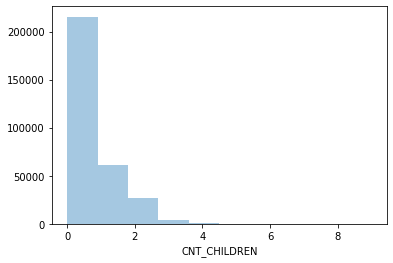

In [271]:
#Checking the box plot again
Numerical_analysis(df1,'CNT_CHILDREN',10)


In [272]:
Numerical_Outlier_analysis(df1,'AMT_INCOME_TOTAL')

Analaysis for Column Name  AMT_INCOME_TOTAL
Describe
 count    3.075010e+05
mean     1.687983e+05
std      2.371262e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
0.10        81000.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
0.90       270000.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


In [273]:
#Getting 0.99 Quantile
q99=df1['AMT_INCOME_TOTAL'].quantile(0.99)
print(df1[df1['AMT_INCOME_TOTAL']>q99]['AMT_INCOME_TOTAL'].count())


3014


In [274]:
df1[df1['AMT_INCOME_TOTAL']>q99]['AMT_INCOME_TOTAL'].sort_values(ascending=False)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
251577       477000.0
285984       477000.0
219387       477000.0
153980       475650.0
182261       475047.0
Name: AMT_INCOME_TOTAL, Length: 3014, dtype: float64

In [275]:
df1[df1['AMT_INCOME_TOTAL']==117000000.0].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,N,N,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [276]:
# Removing the Rows with outiers 117000000.0
df1=df1[~(df1['AMT_INCOME_TOTAL']>=117000000.0)]

### After Analysing removing the outliers,  removing the records which are having 'AMT_INCOME_TOTAL' = 17000000.0 

In [277]:
Numerical_Outlier_analysis(df1,'AMT_INCOME_TOTAL')

Analaysis for Column Name  AMT_INCOME_TOTAL
Describe
 count    3.075000e+05
mean     1.684184e+05
std      1.088119e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64
0.10       81000.0
0.25      112500.0
0.50      147150.0
0.75      202500.0
0.90      270000.0
0.99      472500.0
1.00    18000090.0
Name: AMT_INCOME_TOTAL, dtype: float64


In [278]:
Numerical_Outlier_analysis(df1,'DAYS_EMPLOYED')

Analaysis for Column Name  DAYS_EMPLOYED
Describe
 count    307500.000000
mean      63816.184901
std      141276.758804
min      -17912.000000
25%       -2760.000000
50%       -1213.500000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
0.10     -4881.0
0.25     -2760.0
0.50     -1213.5
0.75      -289.0
0.90    365243.0
0.99    365243.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64


In [279]:
q99=df1['DAYS_EMPLOYED'].quantile(0.99)
df1[df1['DAYS_EMPLOYED']>=q99].head().iloc[:,0:20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,-7427.0,-3514
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,-5246.0,-2512
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,-9012.0,-3684
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-23920,365243,-9817.0,-4969
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,-23548,365243,-5745.0,-4576


### Inference The Value  for NAME_TYPE_SUITE is either Pensioner or unemployed where the value is 365243. So it make sense to have this value, however we shouldnt be considering the value and should filter it out  by using NAME_TYPE_SUITE

In [280]:
# Analysing AMT_REQ_CREDIT_BUREAU_QRT
Numerical_Outlier_analysis(df1,'AMT_REQ_CREDIT_BUREAU_QRT')

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_QRT
Describe
 count    307500.000000
mean          0.265483
std           0.738519
min           0.000000
25%           0.000000
50%           0.000000
75%           0.265474
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0.10      0.000000
0.25      0.000000
0.50      0.000000
0.75      0.265474
0.90      1.000000
0.99      2.000000
1.00    261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [281]:
q99=df1['AMT_REQ_CREDIT_BUREAU_QRT'].quantile(0.99)

print(df1[df1['AMT_REQ_CREDIT_BUREAU_QRT']>q99]['AMT_REQ_CREDIT_BUREAU_QRT'].count())
print(df1[df1['AMT_REQ_CREDIT_BUREAU_QRT']>q99]['AMT_REQ_CREDIT_BUREAU_QRT'].unique())

2301
[  4.   3.   8.   5.   6.   7. 261.  19.]


In [282]:

print(df1[df1['AMT_REQ_CREDIT_BUREAU_QRT']>=19]['AMT_REQ_CREDIT_BUREAU_QRT'].count())

2


In [283]:
# Removing the Rows with outiers 261 and 19 
df1=df1[~(df1['AMT_REQ_CREDIT_BUREAU_QRT']>=19)]

### Inference : After Analysing the outliers,  removing the records which are having 'AMT_REQ_CREDIT_BUREAU_QRT' >=19

Analaysis for Column Name  AMT_REQ_CREDIT_BUREAU_QRT
NUll Value Count 0
Describe
 count    307498.000000
mean          0.264574
std           0.568496
min           0.000000
25%           0.000000
50%           0.000000
75%           0.265474
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


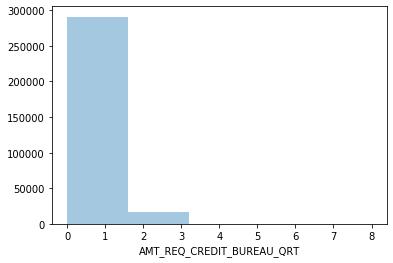

In [284]:
Numerical_analysis(df1,'AMT_REQ_CREDIT_BUREAU_QRT',5)

In [285]:
### Verifying Categorical Columns 
cat_col 

['REG_CITY_NOT_LIVE_CITY',
 'FLAG_PHONE',
 'REG_REGION_NOT_WORK_REGION',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_MOBIL',
 'NAME_HOUSING_TYPE',
 'FLAG_EMP_PHONE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'FLAG_CONT_MOBILE',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'NAME_CONTRACT_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_OWN_CAR']

In [286]:
for col in cat_col: 
    print("\n",df1[col].value_counts())


 N    283460
Y     24038
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

 N    221072
Y     86426
Name: FLAG_PHONE, dtype: int64

 N    291886
Y     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

 Married                 196423
Single / not married     45441
Civil marriage           29775
Separated                19769
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

 Secondary / secondary special    218381
Higher education                  74860
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

 N    236632
Y     70866
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

 Business Entity Type 3    67990
XNA                       55373
Self-employed             38411
Other                     16682
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8892
Trade

### Inference: It was observed fromm the above analysis  that there are some values by name XNA in CODE_GENDER,ORGANIZATION_TYPE columns . We need to handle them as missing values 

In [287]:
#CODE_GENDER column  Replacing the XNA  value with Majority which is female 
df1.loc[df1['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df1['CODE_GENDER'].value_counts()

F    202441
M    105057
Name: CODE_GENDER, dtype: int64

In [288]:
df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67990
XNA                       55373
Self-employed             38411
Other                     16682
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8892
Trade: type 7              7831
Kindergarten               6877
Construction               6720
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2156
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1810
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

### Inference: Since the value count of XNA is 55373  and there is an option called Other  which can be used as not knowing the value can be put up as Other                       

In [289]:
df1.loc[df1['ORGANIZATION_TYPE']=='XNA','ORGANIZATION_TYPE']='Other'
df1['ORGANIZATION_TYPE'].value_counts()

Other                     72055
Business Entity Type 3    67990
Self-employed             38411
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8892
Trade: type 7              7831
Kindergarten               6877
Construction               6720
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2156
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1810
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [290]:
#DAYS_BIRTH column is age of the individaul at the time of loan application.

df1['AGE'] =df1['DAYS_BIRTH']//-365
df1.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [291]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
df1['age_group']=pd.cut(df1.AGE,bins=[0,20,30,40,50,60,9999],labels=['<20', '20-30', '30-40' ,'40-50','50-60','60+'])         

In [292]:
df1['age_group'].value_counts()

30-40    83112
40-50    74397
50-60    67817
20-30    52803
60+      29368
<20          1
Name: age_group, dtype: int64

In [293]:
#  Creating groups  for income amount
df1['Income_group']=pd.qcut(df1['AMT_INCOME_TOTAL'],q=[0,0.25,0.50,0.90,1],labels=['Lower','Middle','Higher','Very_High'])


In [294]:
df1['Income_group'].value_counts()

Higher       126587
Lower        100572
Middle        53182
Very_High     27157
Name: Income_group, dtype: int64

# Checking Imbalance

In [295]:
df1['TARGET'].value_counts()

0    282676
1     24822
Name: TARGET, dtype: int64

In [296]:
# Clients paying on time
Non_Defaulters=(df1['TARGET']==0).sum()

In [297]:
# Clients with payment difficulties
Defaulters=(df1['TARGET']==1).sum()

In [298]:
# Check in Imbalance

# Ratio  for imbalance
print ('Imbalance Ratio ',round(Non_Defaulters/Defaulters,2))


Imbalance Ratio  11.39


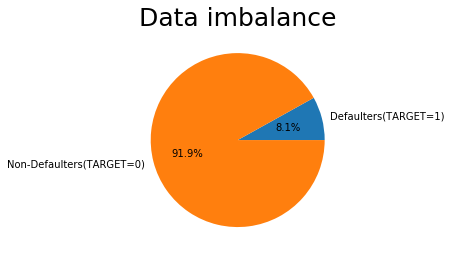

In [299]:
labels = ['Defaulters(TARGET=1)','Non-Defaulters(TARGET=0)']
y = [Defaulters, Non_Defaulters]
plt.pie( y, labels=labels, autopct='%1.1f%%')
plt.title('Data imbalance',fontsize=25)
plt.show()

### Inference: Imbalance Ratio is 11.39 which is very High Hence Splitting them in to train_0 and train_1

In [300]:
# Since there is a lot of imbalance, lets separate out these
train_0 = df1.loc[df1['TARGET'] == 0]
train_1 = df1.loc[df1['TARGET'] == 1]

In [301]:
# categorical columns are:
cat_col = list(set(df1.columns) - set(df1.describe().columns))
cat_col

['REG_CITY_NOT_LIVE_CITY',
 'FLAG_PHONE',
 'REG_REGION_NOT_WORK_REGION',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'Income_group',
 'FLAG_MOBIL',
 'NAME_HOUSING_TYPE',
 'FLAG_EMP_PHONE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'FLAG_CONT_MOBILE',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'age_group',
 'NAME_CONTRACT_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_OWN_CAR']

In [302]:
# Numerical columns:
num_col = df1.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'],
      dtype='object')

In [303]:
#Plotting Method for Categorical Values 
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [304]:
train_categorical = df1.select_dtypes(include=['object']).columns
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE'],
      dtype='object')

## Univariate Analysis of the categorical data

Plotting  NAME_CONTRACT_TYPE


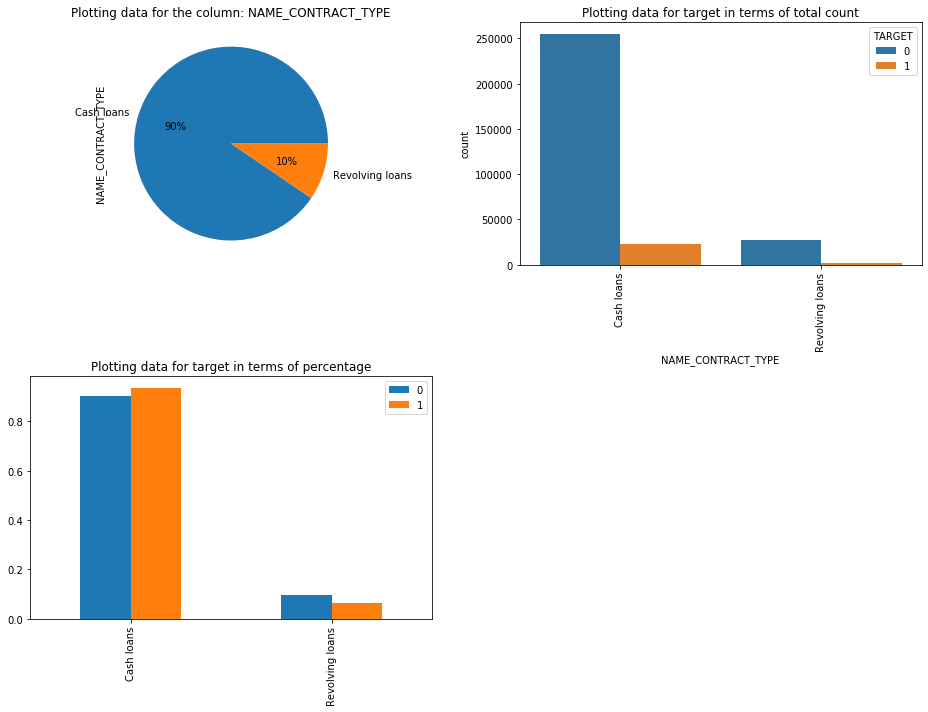

Plotting  CODE_GENDER


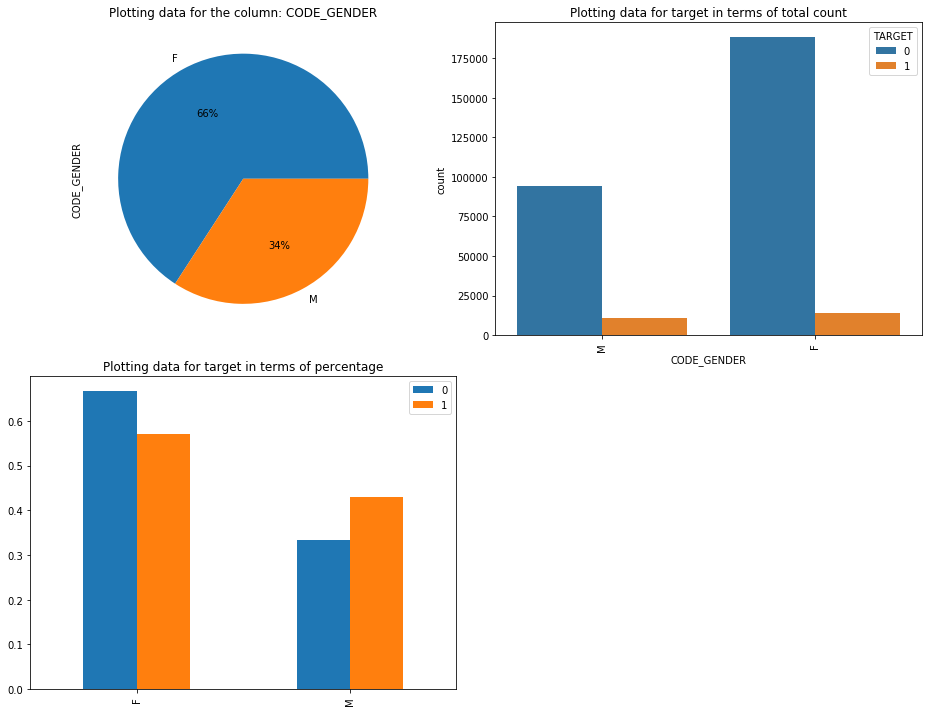

Plotting  FLAG_OWN_CAR


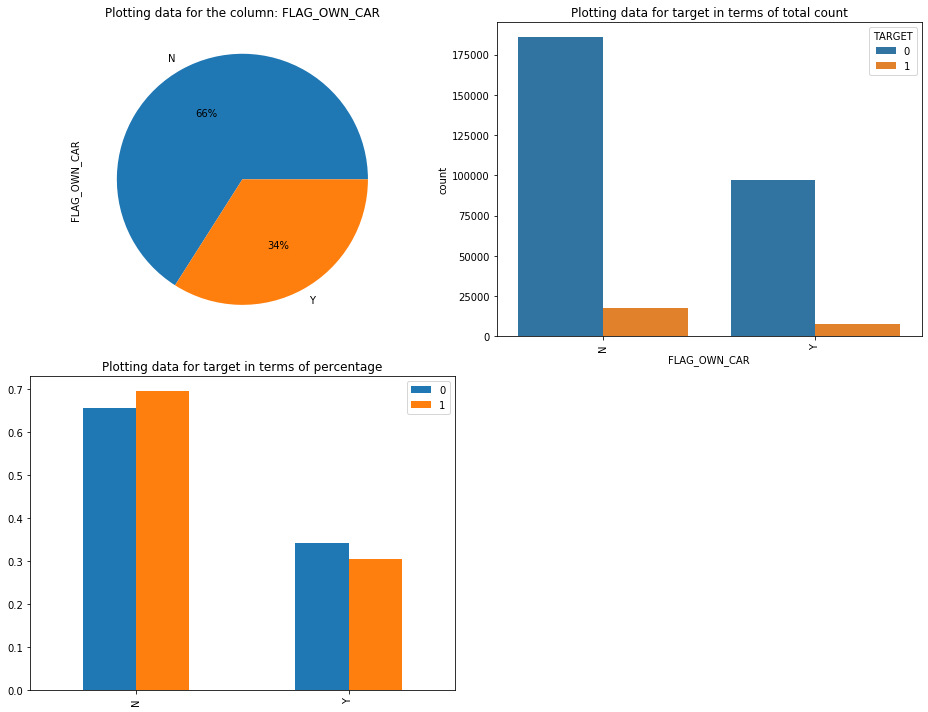

Plotting  FLAG_OWN_REALTY


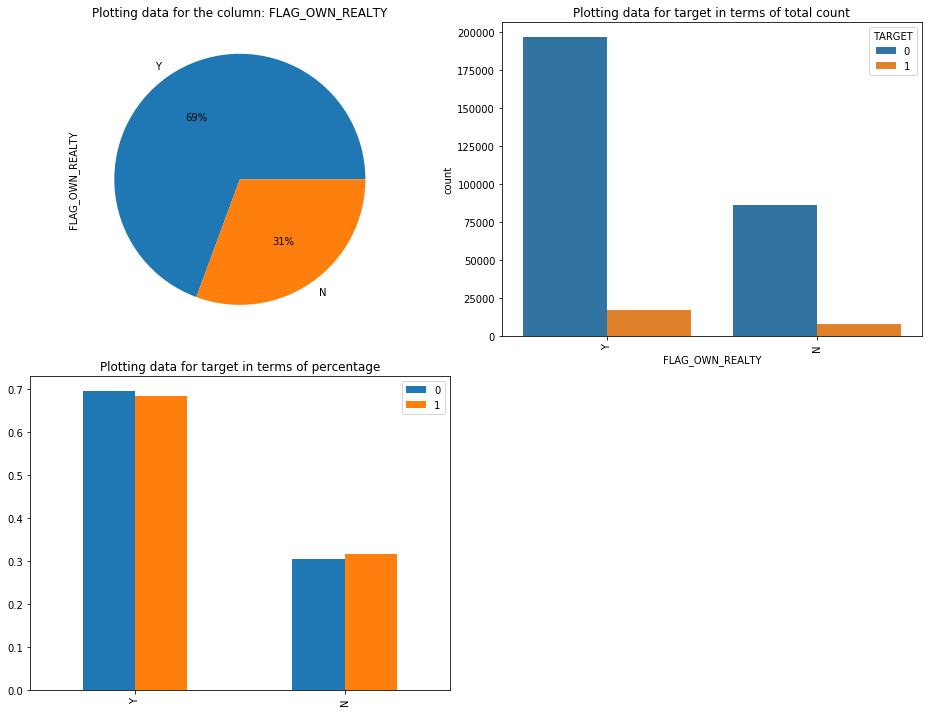

Plotting  NAME_TYPE_SUITE


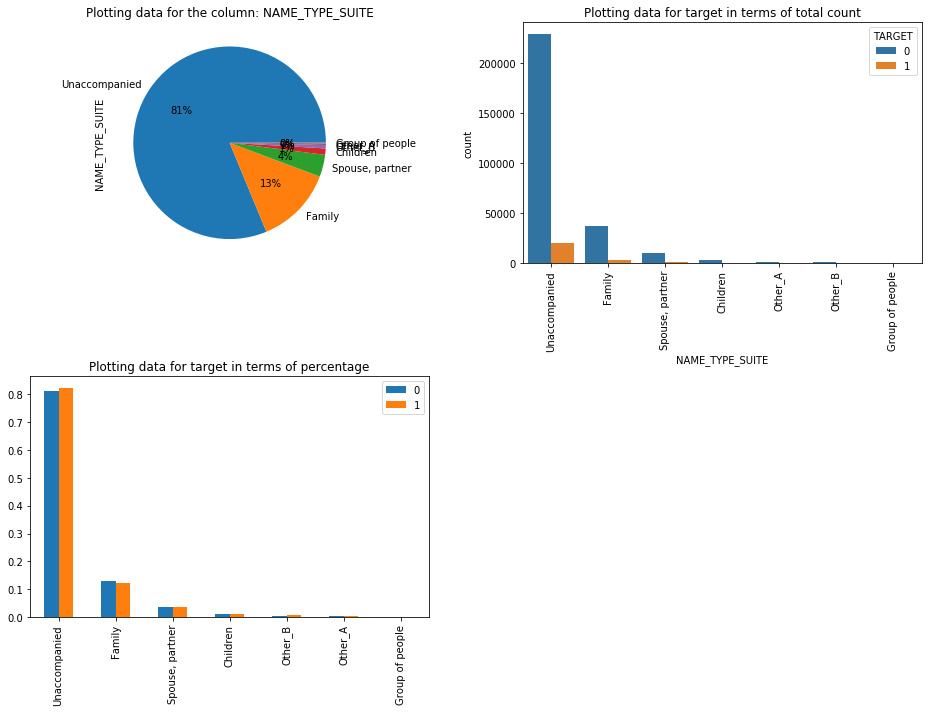

Plotting  NAME_INCOME_TYPE


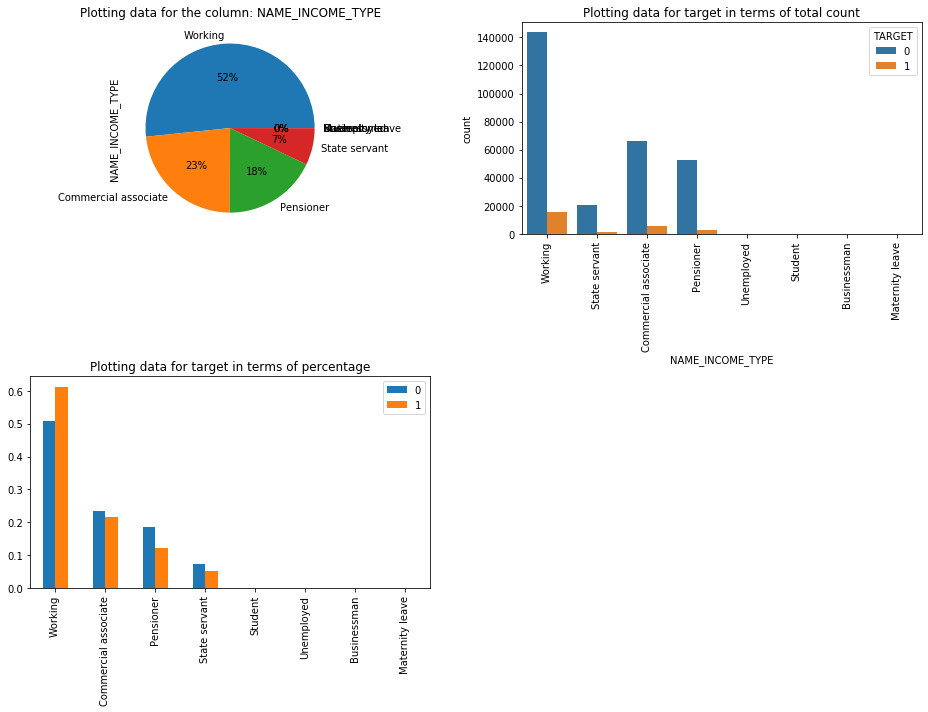

Plotting  NAME_EDUCATION_TYPE


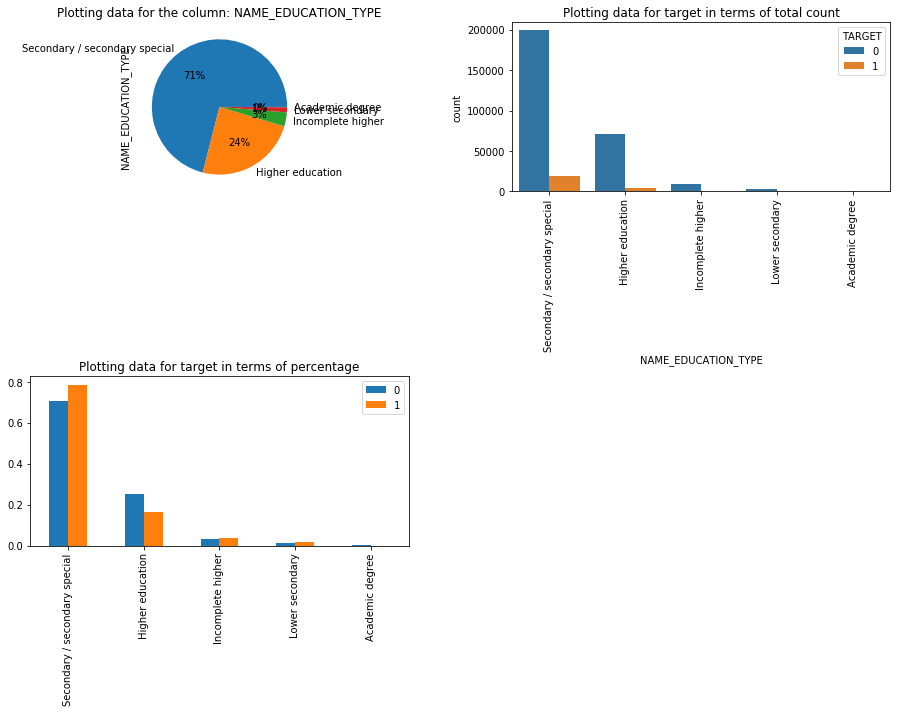

Plotting  NAME_FAMILY_STATUS


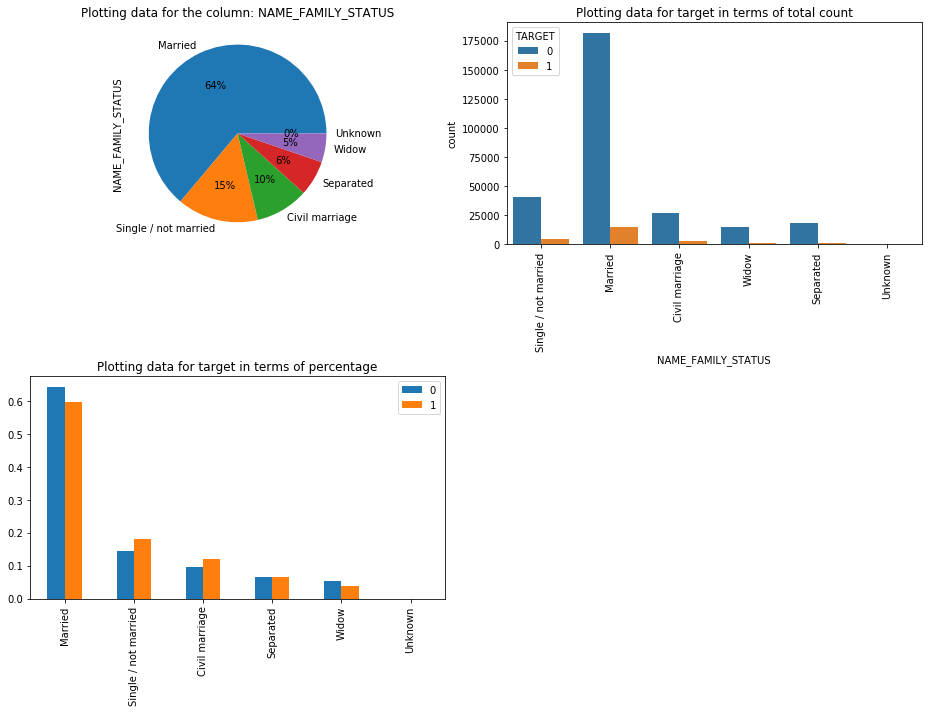

Plotting  NAME_HOUSING_TYPE


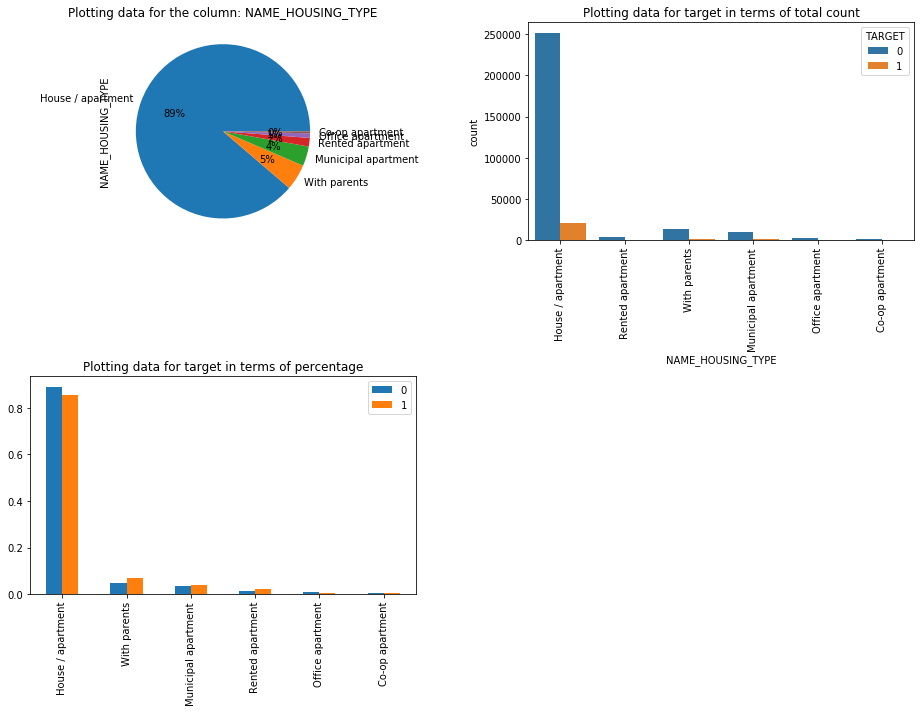

Plotting  FLAG_MOBIL


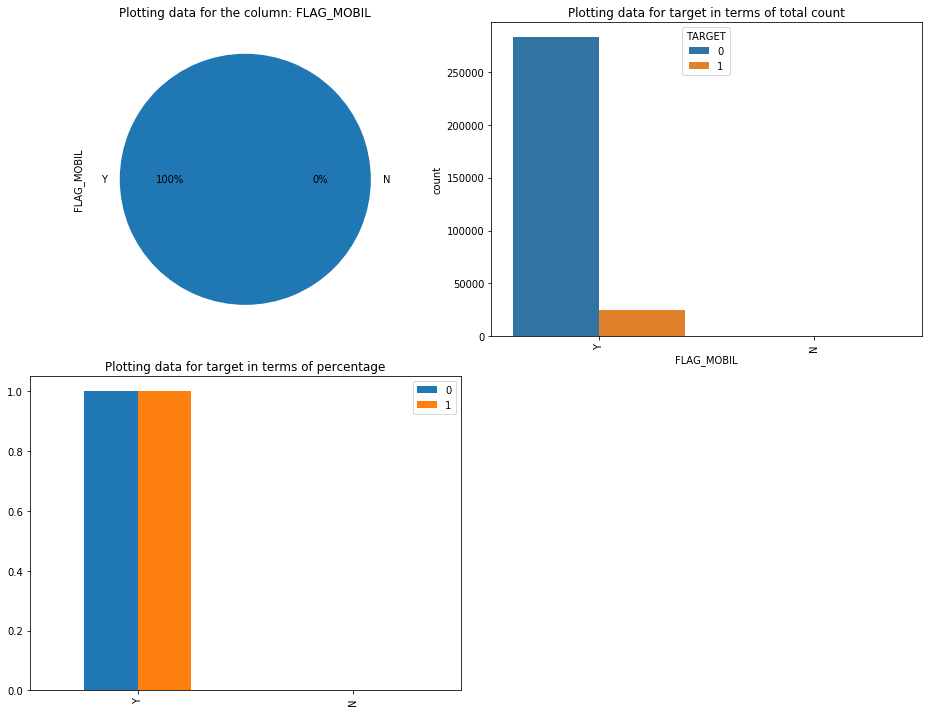

Plotting  FLAG_EMP_PHONE


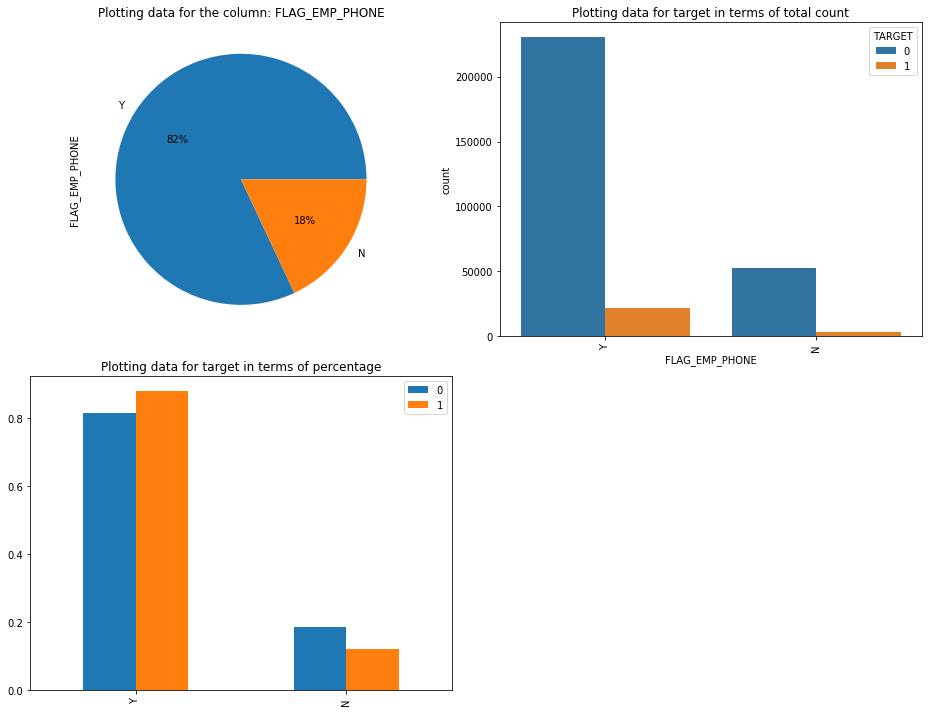

Plotting  FLAG_WORK_PHONE


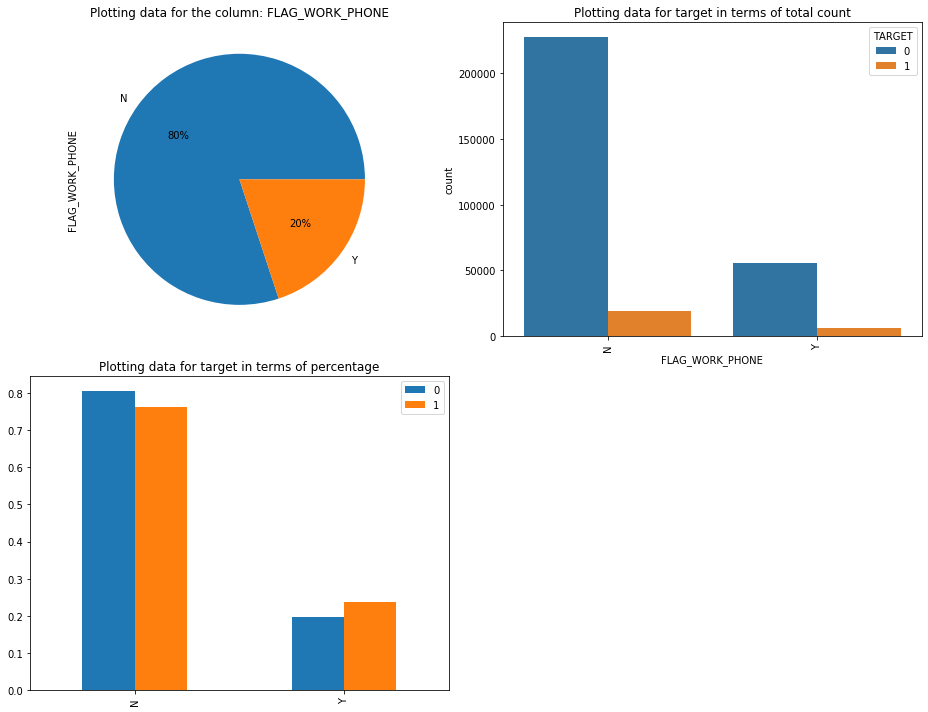

Plotting  FLAG_CONT_MOBILE


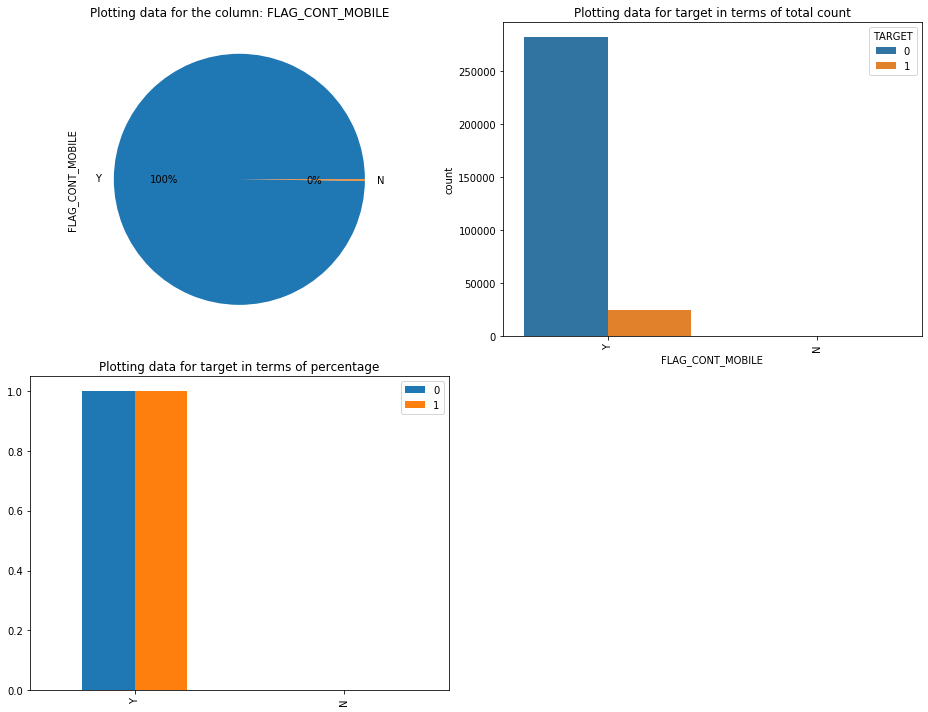

Plotting  FLAG_PHONE


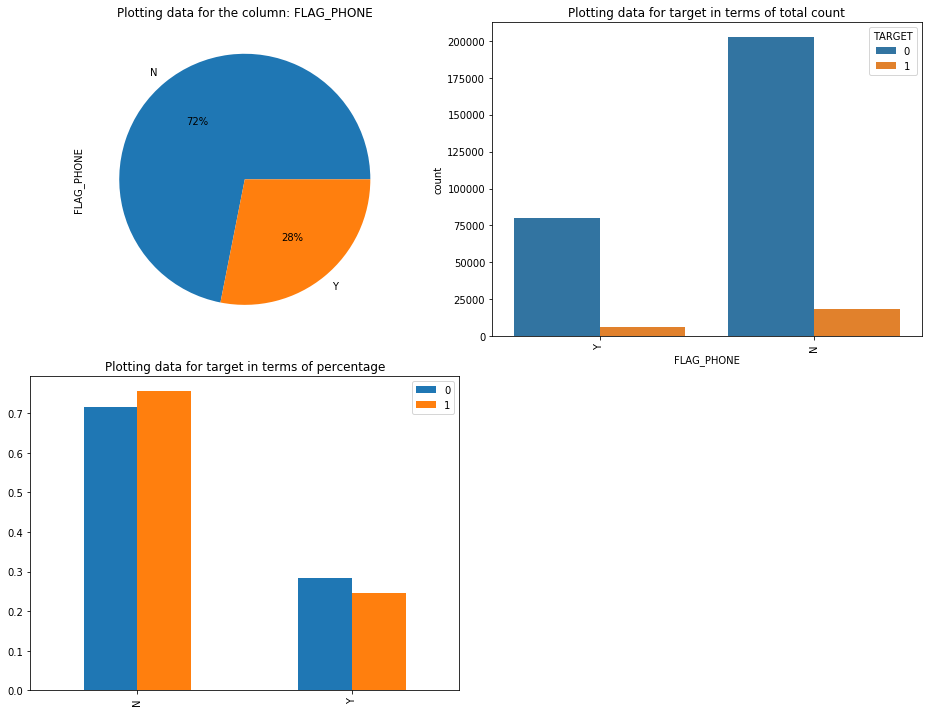

Plotting  FLAG_EMAIL


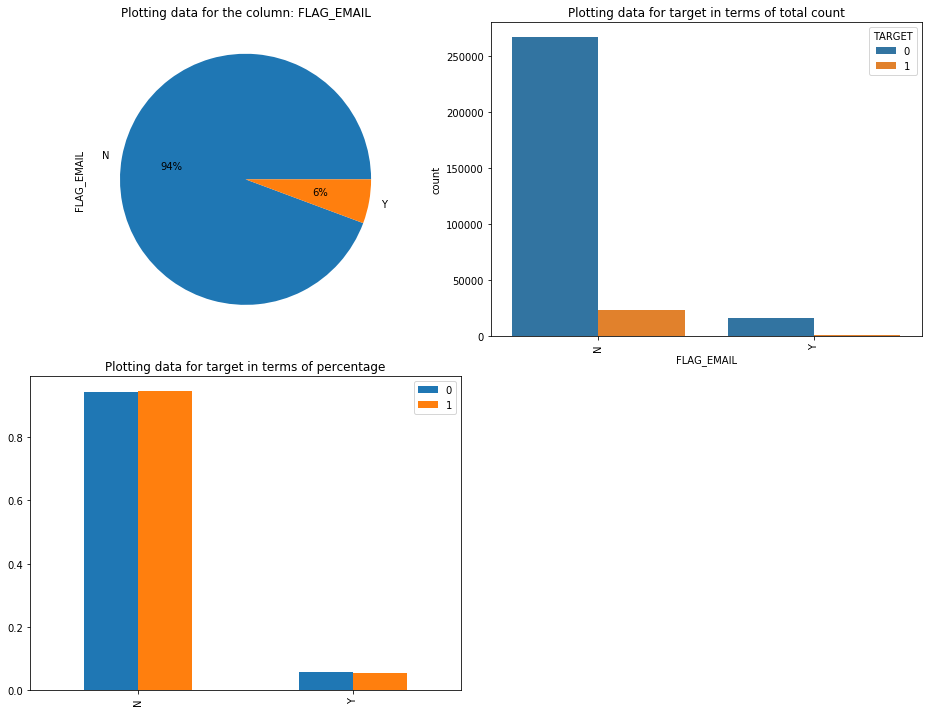

Plotting  OCCUPATION_TYPE


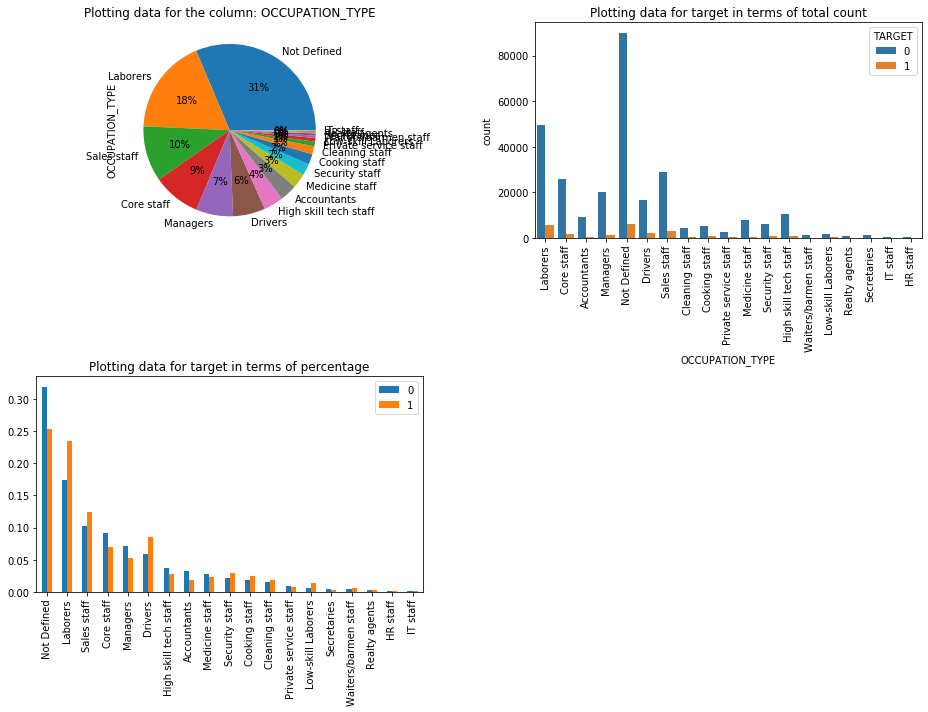

Plotting  WEEKDAY_APPR_PROCESS_START


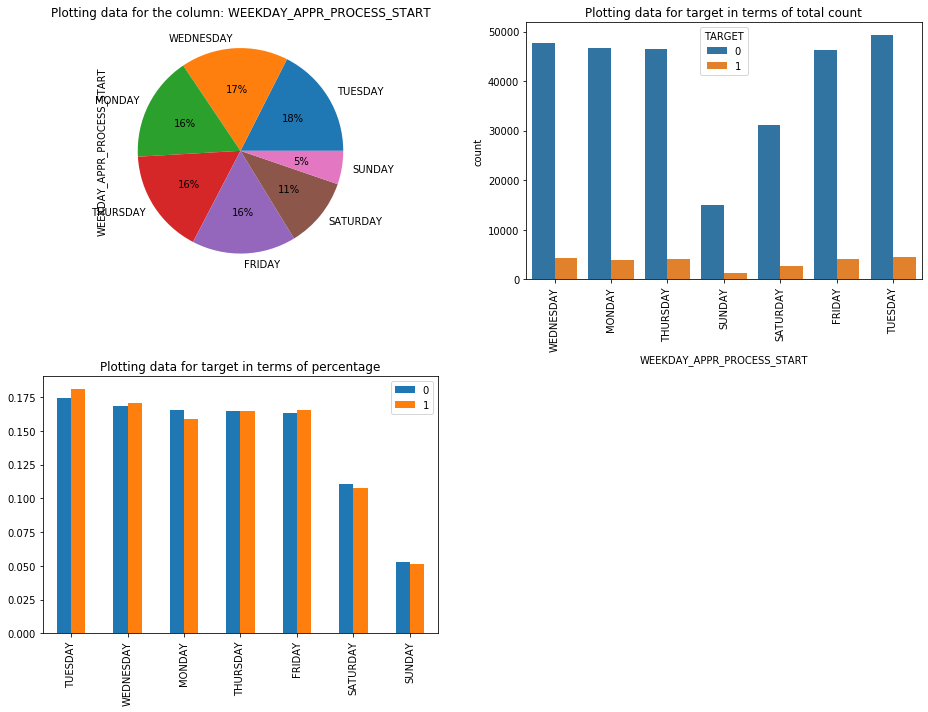

Plotting  REG_REGION_NOT_LIVE_REGION


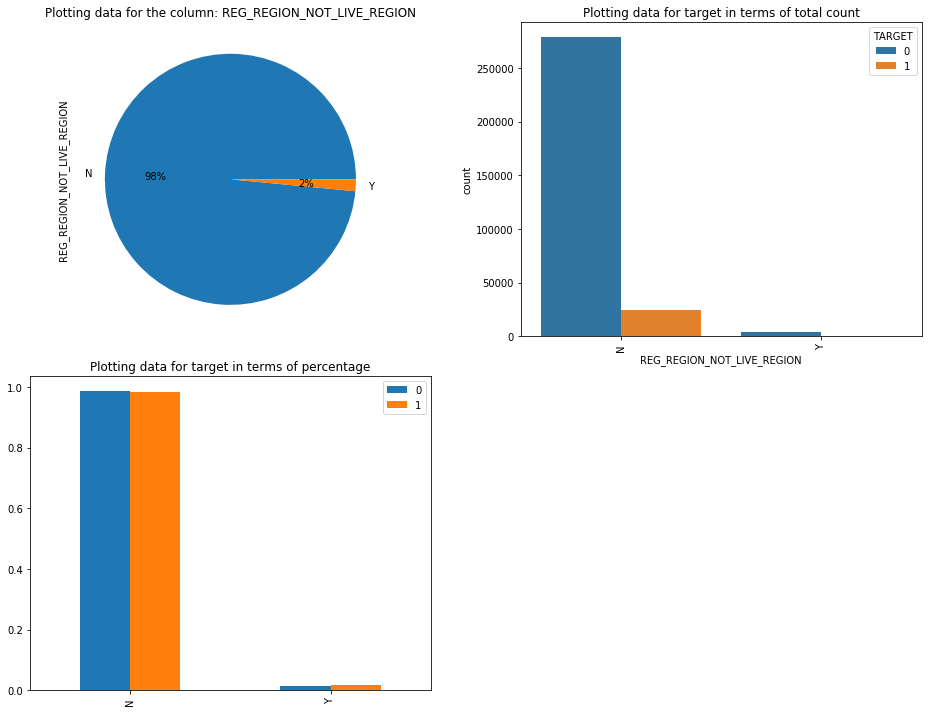

Plotting  REG_REGION_NOT_WORK_REGION


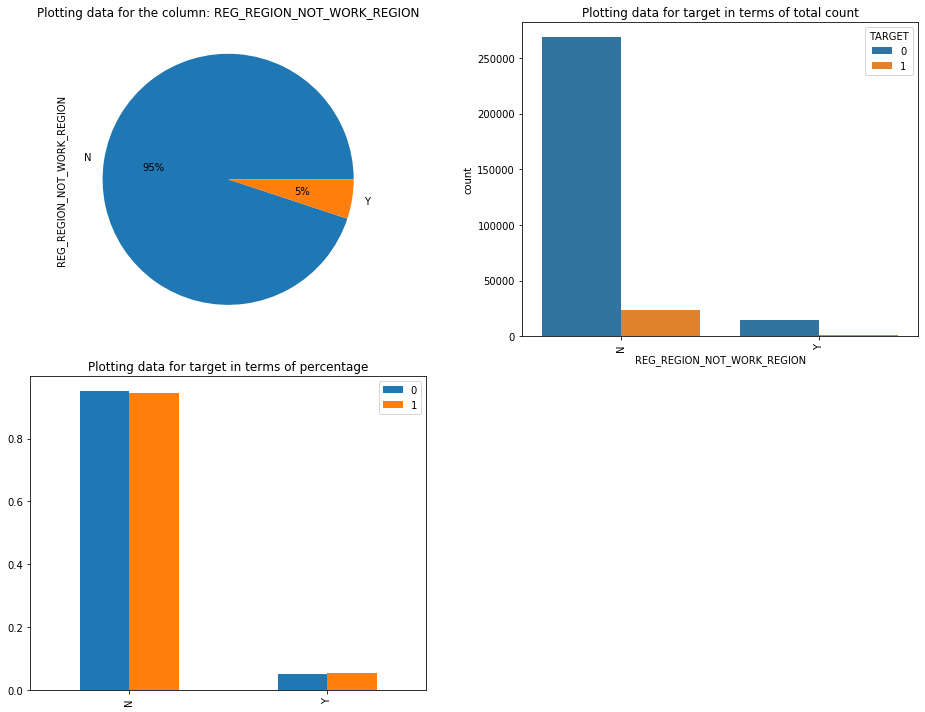

Plotting  LIVE_REGION_NOT_WORK_REGION


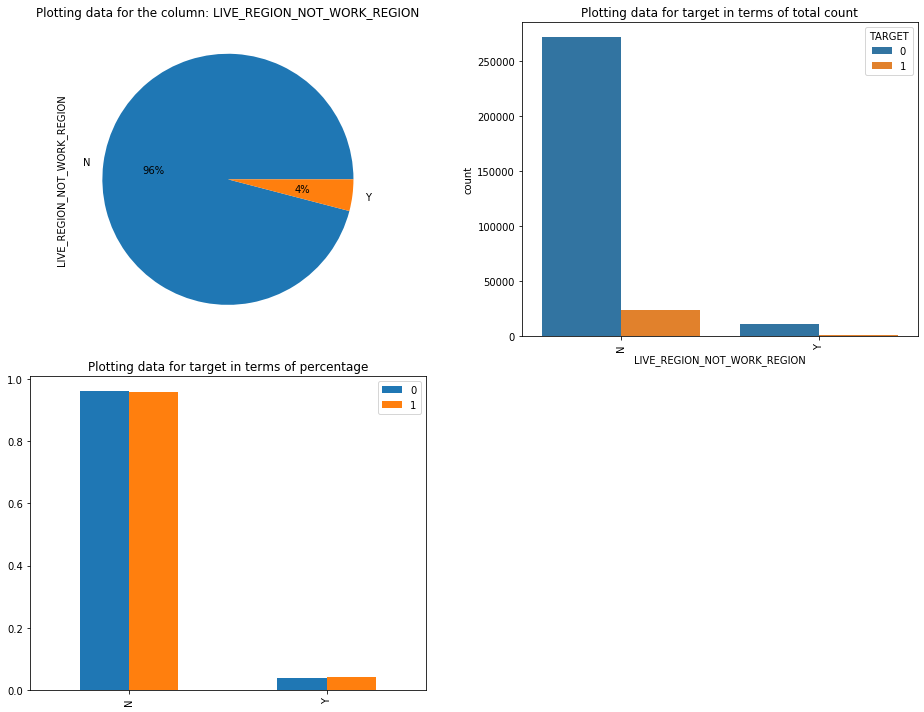

Plotting  REG_CITY_NOT_LIVE_CITY


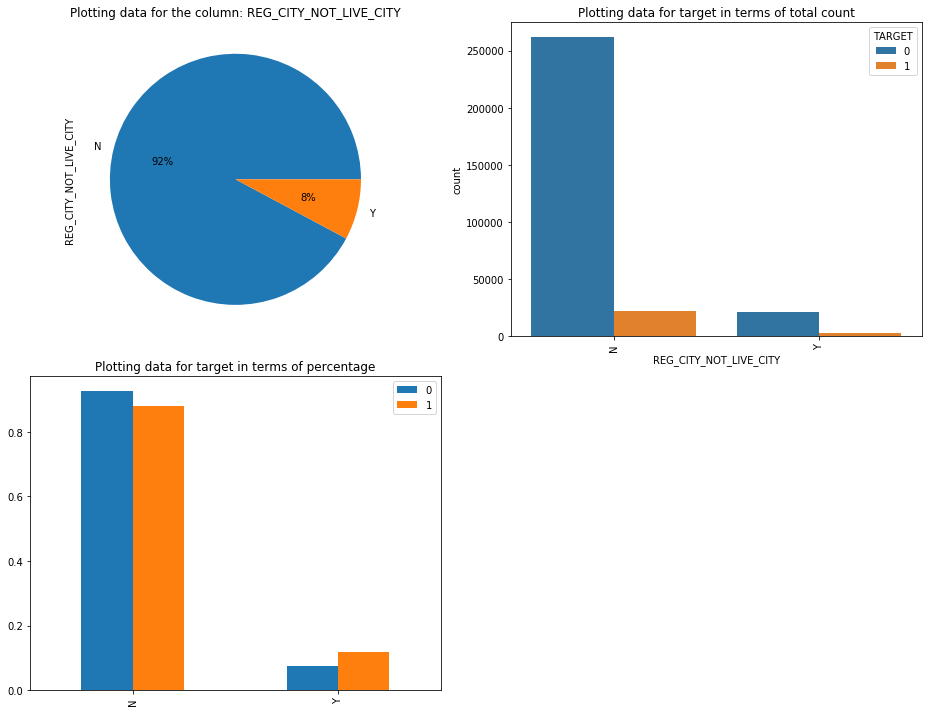

Plotting  REG_CITY_NOT_WORK_CITY


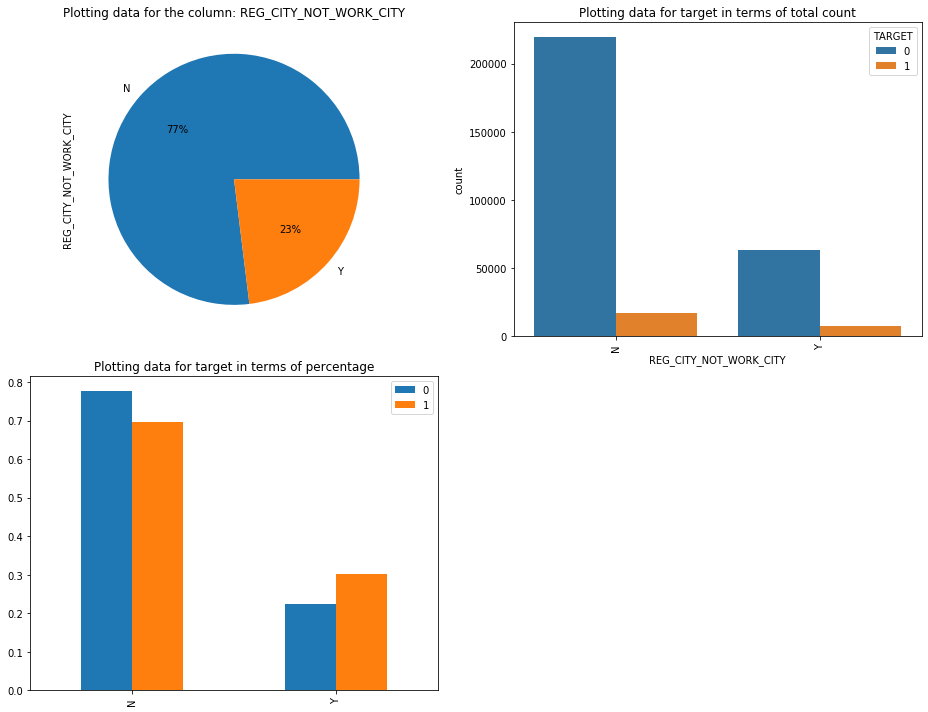

Plotting  LIVE_CITY_NOT_WORK_CITY


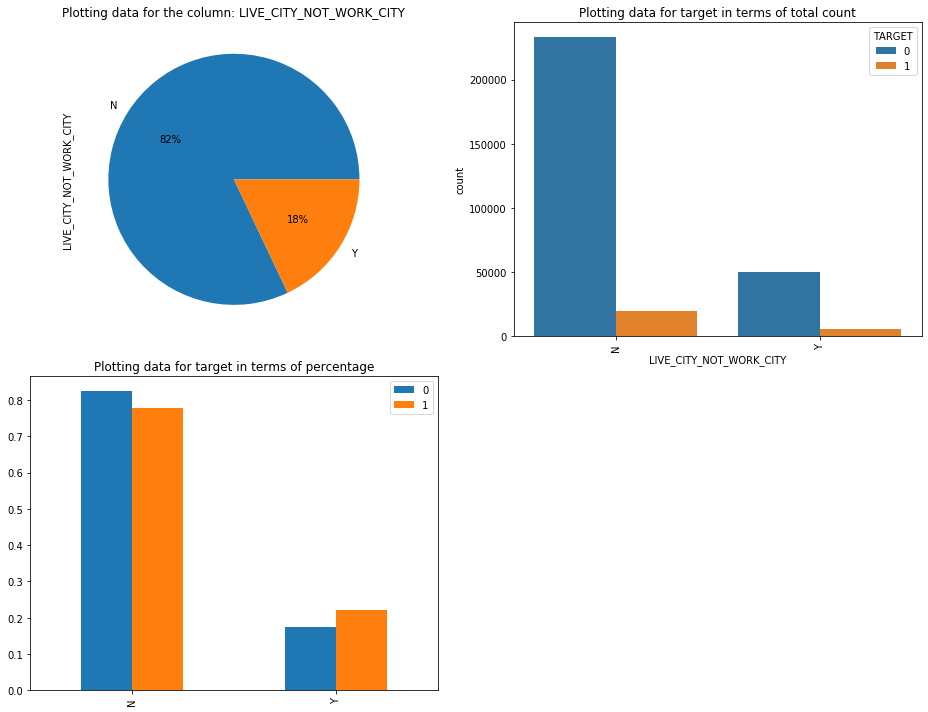

Plotting  ORGANIZATION_TYPE


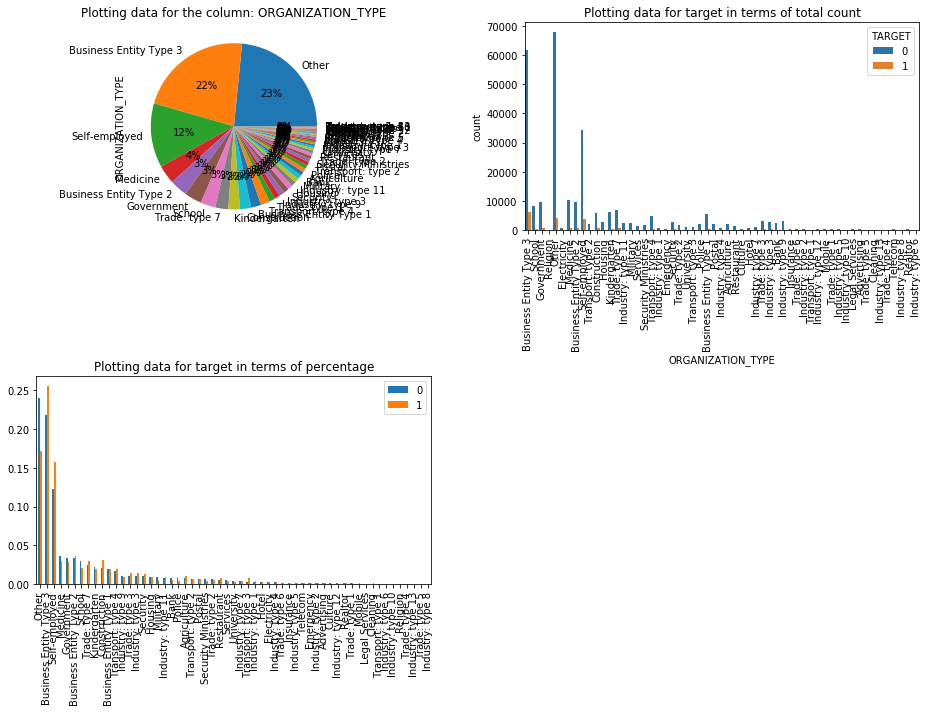

In [305]:
for column in train_categorical:
    print("Plotting ", column)
    plotting(df1,train_0, train_1, column)

# Unordered Categorical Variables



Analysing  NAME_CONTRACT_TYPE


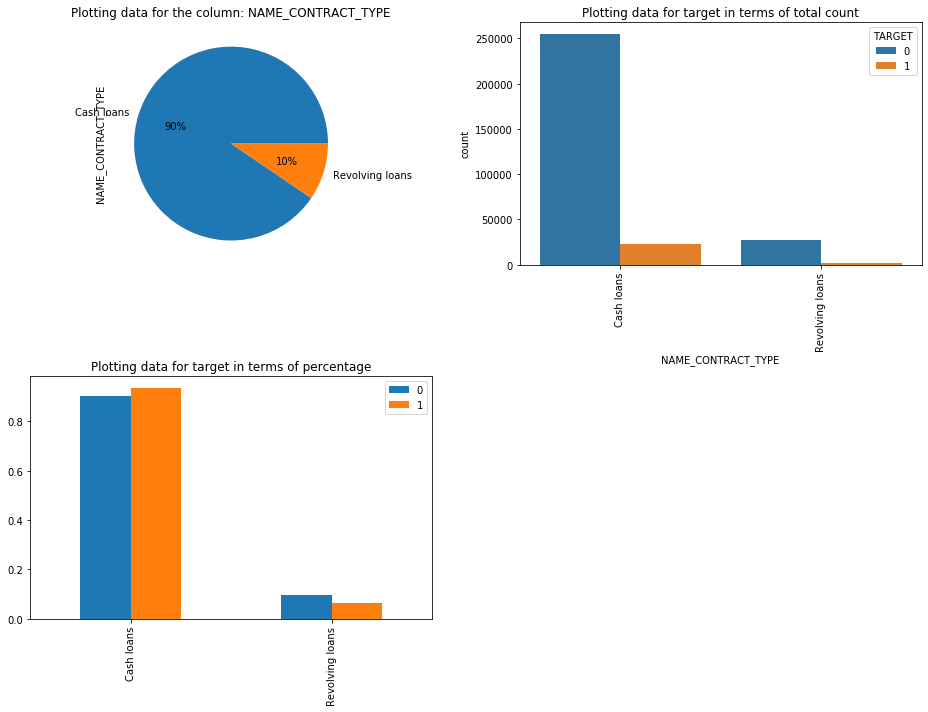

In [306]:
column= "NAME_CONTRACT_TYPE"
print("Analysing ", column)
plotting(df1,train_0, train_1, column)

### Inference: Name_Contract_Type is a column which gives the  type of loan whether it is a Cash Loan or Revolving Loan . As per the  Pie Chart ,we see that 90% of the loans are Cash loans and 10 %  are Revolving Loans. The percentage of Defaulters(Target=1) for cash loans is more as compared to Revolving Loans . This Can be attributed to revolving loans as more risk Free .

Analysing  CODE_GENDER


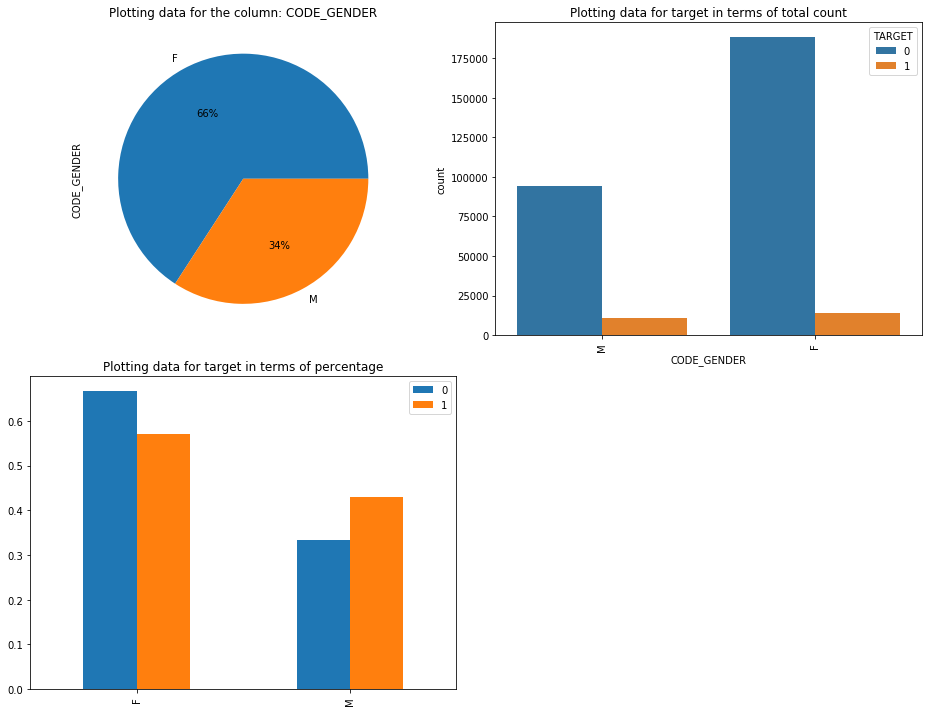

In [307]:
column= "CODE_GENDER"
print("Analysing ", column)
plotting(df1,train_0, train_1, column)

### Inference:  CODE_GENDER which tells whether the Applicant is Male or Female. AS per the Pie Graph  , it is observed that 66% are females Applicants  and 34% are Male Applicants . Even though the female applicants are more , Male Applicants default more than Females. This puts giving loans to females is safer 

Analysing  FLAG_OWN_REALTY


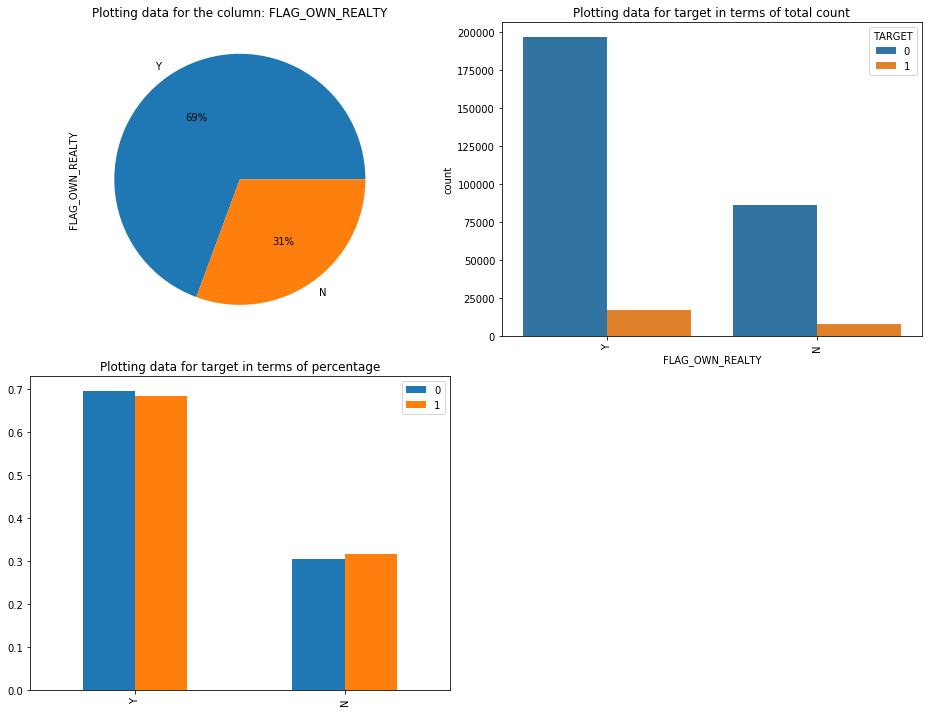

In [308]:
column= "FLAG_OWN_REALTY"
print("Analysing ", column)
plotting(df1,train_0, train_1, column)

### Inference: FLAG_OWN_REALTY is a column which tells whehter the applicant owns  house/flat. As per the pie Graph  , we can infer that 69%  own homes . However as the margin is less between Defaulters and Non Defaulters , we can say that is difficult to take a loan decision based on this Metric.

Analysing  NAME_FAMILY_STATUS


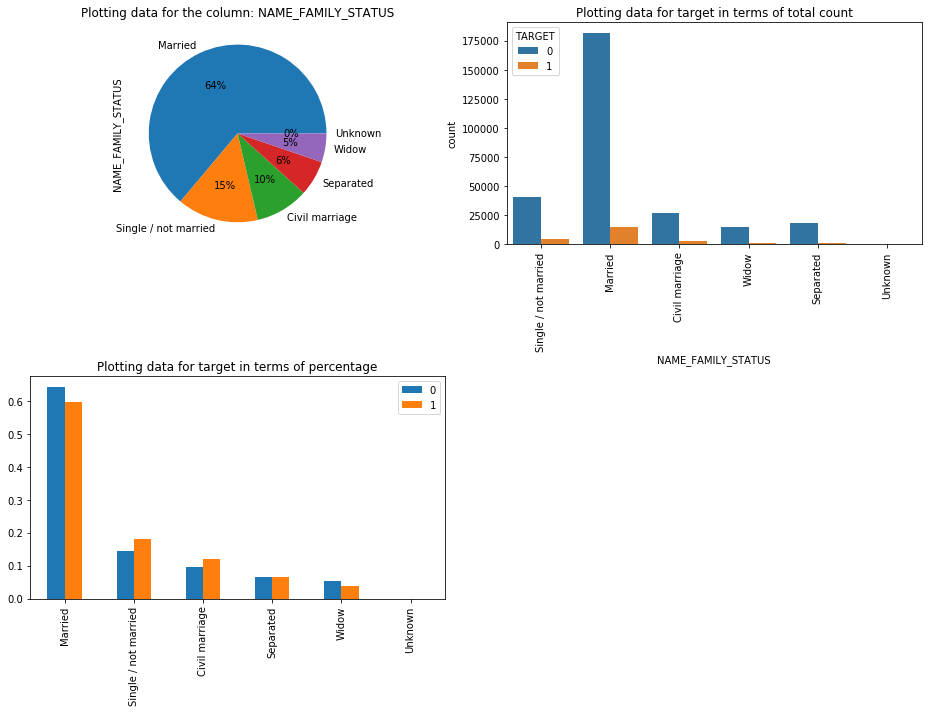

In [309]:
column= "NAME_FAMILY_STATUS"
print("Analysing ", column)
plotting(df1,train_0, train_1, column)

### Inference: NAME_FAMILY_STATUS is a column which gives the Family status of the applicant. As per the pie Graph  , we can infer that 64% of the applicants are Married . Applicants who are single or not Married are Defaulting more than other Categories .Hence We can say it is more Risky to give a Loan to Single/Not Married Applicants.


Analysing  NAME_INCOME_TYPE


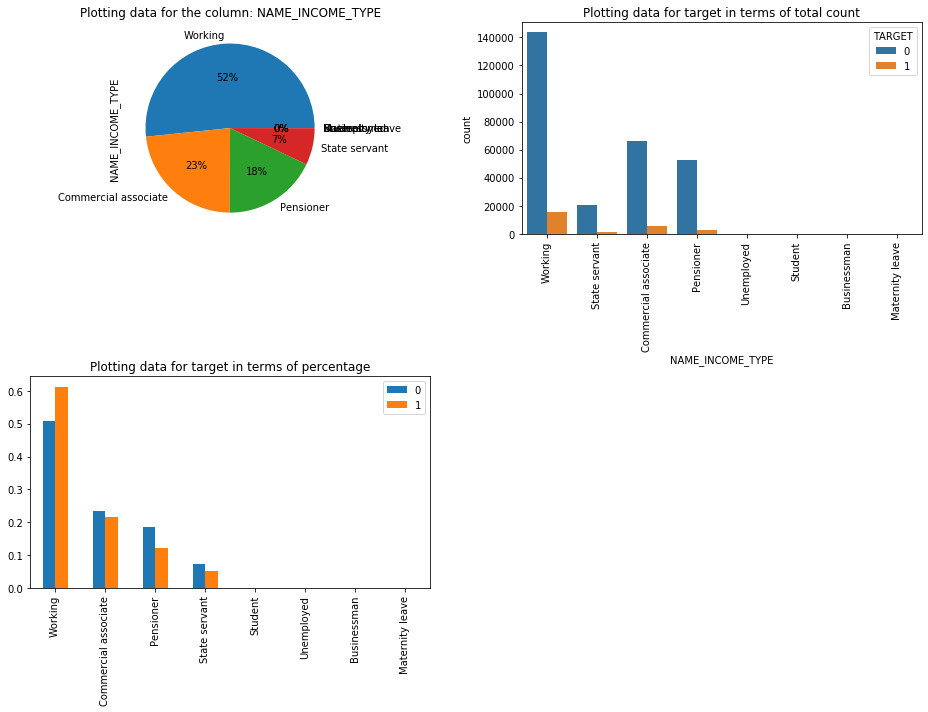

In [310]:
column= "NAME_INCOME_TYPE"
print("Analysing ", column)
plotting(df1,train_0, train_1, column)

### Inference: NAME_INCOME_TYPE is a column which gives the Income Type ofthe applicant. As per the pie Graph, we can infer that 52% of the applicants are Working and they are highest defaulters . 

# Ordered Categorical Variables 




Analysing  NAME_EDUCATION_TYPE


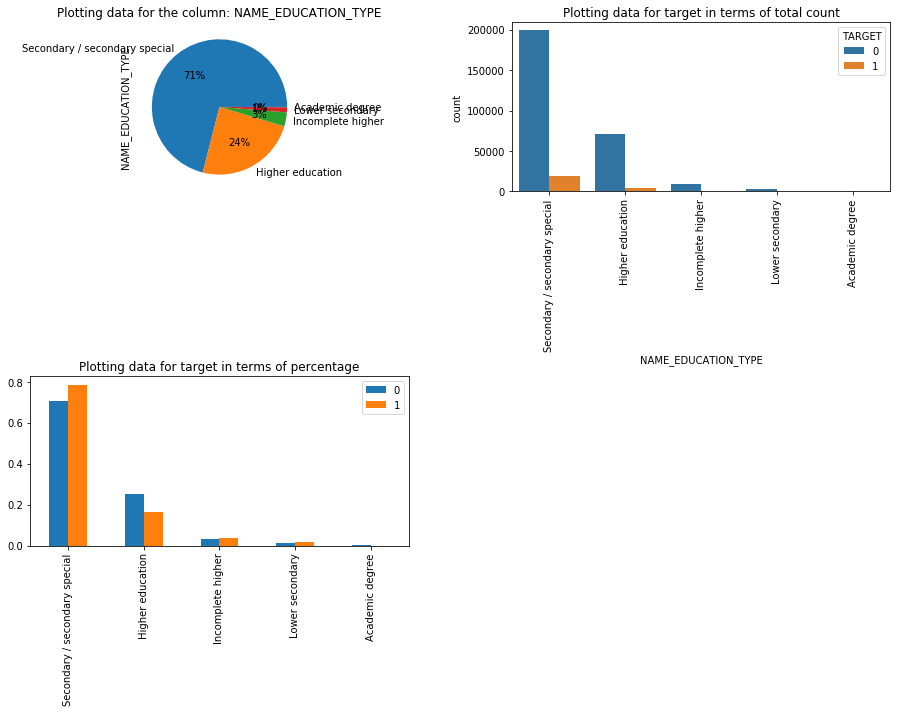

In [311]:
column= "NAME_EDUCATION_TYPE"
print("Analysing ", column)
plotting(df1,train_0, train_1, column)

### Inference: NAME_EDUCATION_TYPE is a column which gives the Education Level of the applicant. As per the pie Graph, we can infer that 71% of the applicants are having an education of Secondary/Secondary Special. Only for the Higher Education the default Rate is less. Hence we can say Higher the Education  lesser the Default Risk.

Analysing  CNT_FAM_MEMBERS


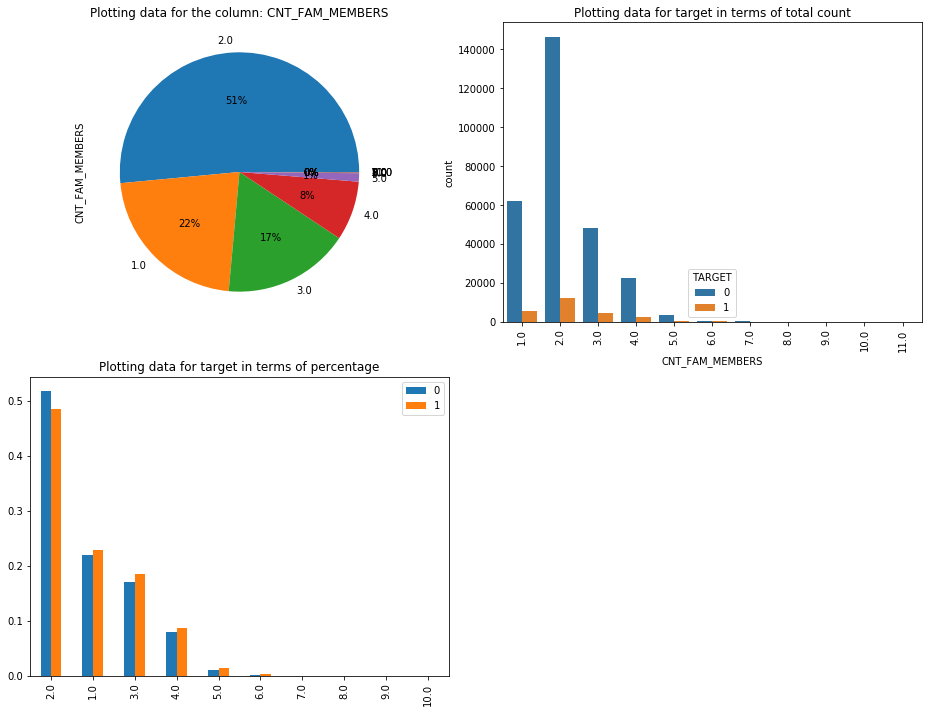

In [312]:
column= "CNT_FAM_MEMBERS"
print("Analysing ", column)
plotting(df1,train_0, train_1, column)

### Inference: CNT_FAM_MEMBERS is a column which gives the number of Family Members of the applicant. As per the pie Graph, we can infer that 51% of the applicants have 2 members as Family . We can see that Higher count of Family numbers is available in Defaulters than Non Defaulaters. So we can sauy Higher Family Number can have a high Default Risk. 

Analysing  age_group


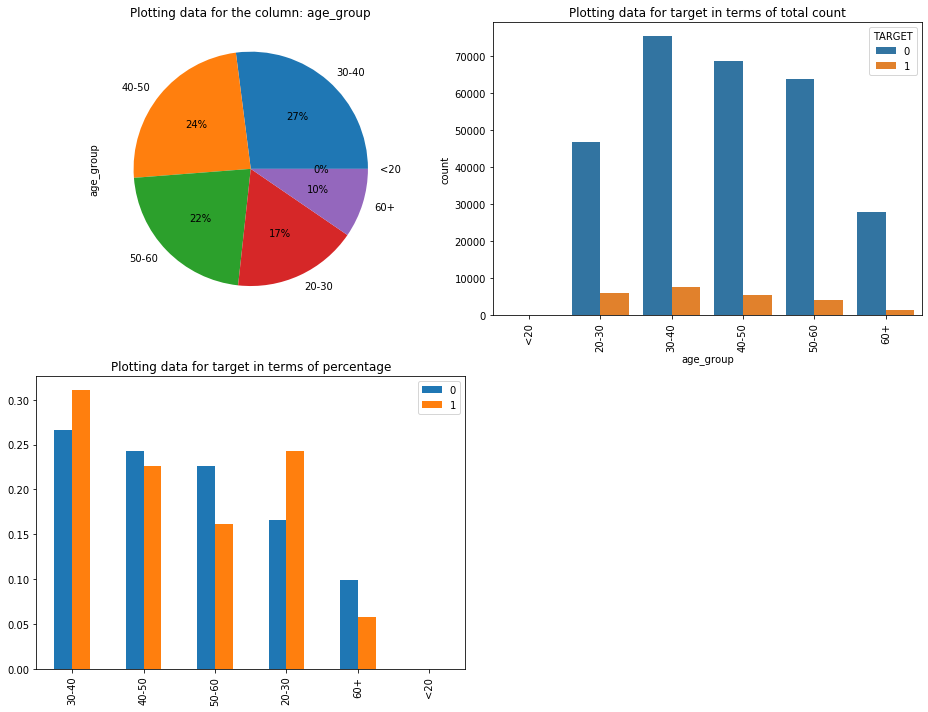

In [313]:
column= "age_group"
print("Analysing ", column)
plotting(df1,train_0, train_1, column)

### Inference 'age_group' is the Derviced column from Daysof Birth.It can be clearly seen that all the Ages of Applicants are above 20 and is split evenly across the differnt age groups. Age Group of 20-40 have more people as Defaulters . Hence we can say that the age Group 20-40 is more Risky 

Analysing  Income_group


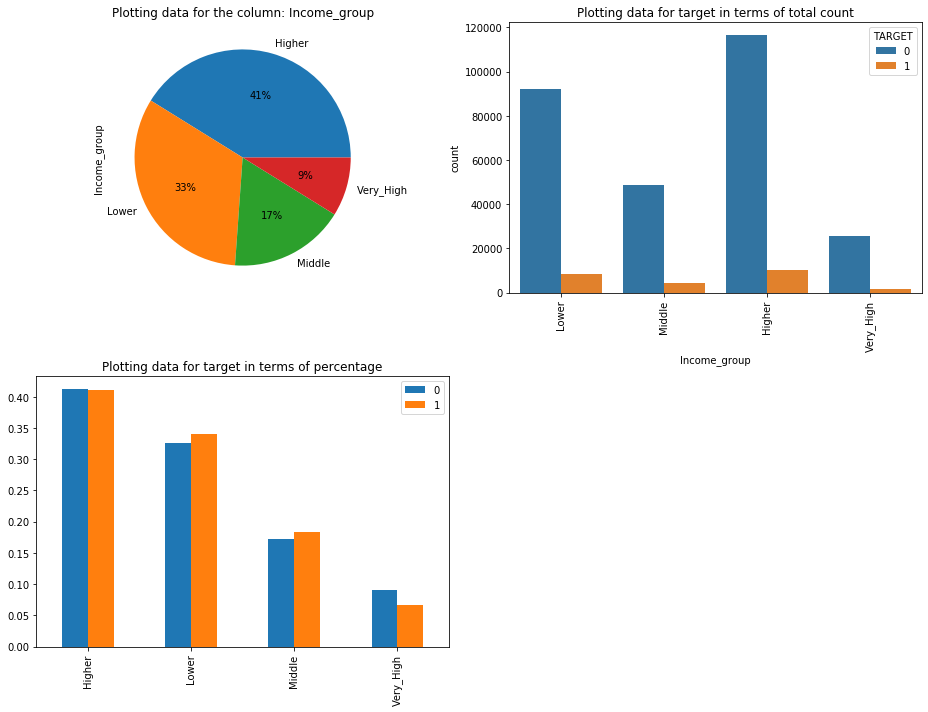

In [314]:
column= "Income_group"
print("Analysing ", column)
plotting(df1,train_0, train_1, column)

### Inference: 'Income_Group' is the Derived column from AMT_INCOME_TOTAL.As per the pie Chart , Higher income Group are applying for loans at 41 % .However In Lower income Group ,the percentage of Defaulters are High making them more risky to issue a Loan 

## Correlation of Numerical Columns for  Target 0 and 1 

In [315]:
# Corrrelation Values for Target==0 or Non Defaulters
train_0_corr=train_0.iloc[0:,2:].corr()
train_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
CNT_CHILDREN,1.000000,0.027730,0.003315,0.021182,-0.000318,-0.244677,0.186923,-0.029018,0.877702,0.023160,0.022156,-0.005299,-0.008315,-0.000364,0.000641,-0.001688,-0.009720,-0.009892,-0.040150,-0.338619
AMT_INCOME_TOTAL,0.027730,1.000000,0.342793,0.418940,0.349356,-0.141245,0.064924,0.022899,0.034512,-0.186561,-0.200453,0.076734,-0.041358,0.001225,0.006809,0.005424,0.053411,0.012260,0.025531,-0.062495
AMT_CREDIT,0.003315,0.342793,1.000000,0.771296,0.986879,-0.072525,0.013487,-0.001461,0.064939,-0.103337,-0.112238,0.053614,-0.069554,-0.003503,0.004118,-0.001746,0.050713,0.020275,-0.045873,0.047351
AMT_ANNUITY,0.021182,0.418940,0.771296,1.000000,0.776253,-0.106426,0.039438,0.014115,0.076183,-0.132113,-0.145137,0.053590,-0.062029,0.002911,0.002209,0.011746,0.035316,0.013388,-0.010093,-0.012267
AMT_GOODS_PRICE,-0.000318,0.349356,0.986879,0.776253,1.000000,-0.071042,0.015919,-0.003644,0.063171,-0.104345,-0.112562,0.062730,-0.071365,-0.002922,0.004504,-0.001475,0.052362,0.020344,-0.048085,0.044520
DAYS_EMPLOYED,-0.244677,-0.141245,-0.072525,-0.106426,-0.071042,1.000000,-0.210173,-0.274291,-0.238185,0.037848,0.040025,-0.094849,0.027086,-0.004183,-0.000745,0.002152,-0.033088,0.019566,0.048524,0.617965
DAYS_REGISTRATION,0.186923,0.064924,0.013487,0.039438,0.015919,-0.210173,1.000000,0.100237,0.176294,0.075859,0.069370,-0.008046,0.053522,-0.002544,-0.000033,-0.001332,-0.011052,-0.001292,-0.024827,-0.333019
DAYS_ID_PUBLISH,-0.029018,0.022899,-0.001461,0.014115,-0.003644,-0.274291,0.100237,1.000000,-0.020601,-0.008999,-0.011735,0.033993,0.082956,0.004423,-0.000157,-0.001537,-0.008141,-0.008348,-0.032608,-0.270801
CNT_FAM_MEMBERS,0.877702,0.034512,0.064939,0.076183,0.063171,-0.238185,0.176294,-0.020601,1.000000,0.028120,0.028889,-0.010629,-0.028813,0.000760,0.000190,-0.000448,-0.007191,-0.006459,-0.028406,-0.286627
REGION_RATING_CLIENT,0.023160,-0.186561,-0.103337,-0.132113,-0.104345,0.037848,0.075859,-0.008999,0.028120,1.000000,0.950147,-0.284061,0.023290,0.006162,-0.002677,0.001599,-0.064690,0.006460,0.009017,-0.002421


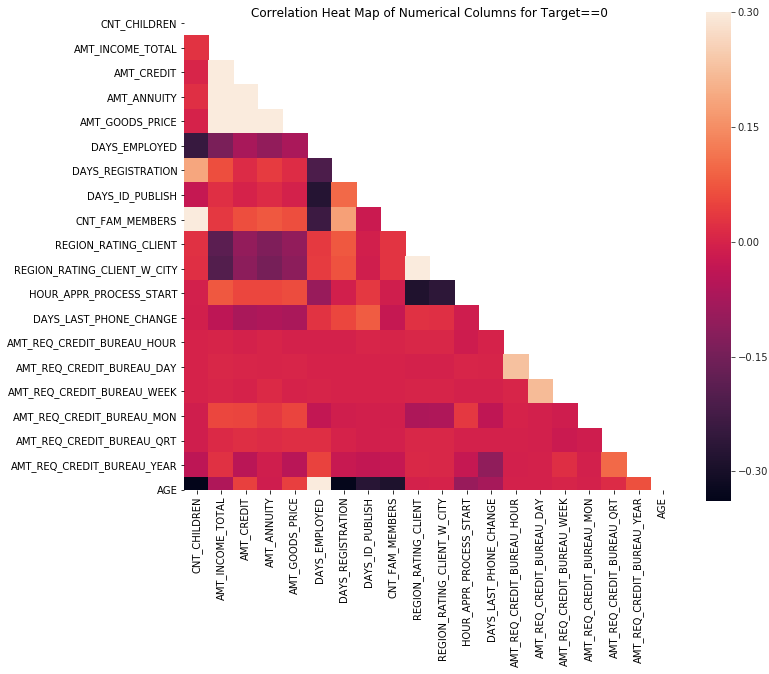

In [316]:
#Correlation Heat Map of Numerical Columns for Target==0
import numpy as np
corr = train_0_corr
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);
    plt.title('Correlation Heat Map of Numerical Columns for Target==0')

In [317]:
# Top 10 Corrrelation Values for Target==0 or Non Defaulters
correlation_0 = train_0_corr.abs()
correlation_0 = correlation_0.unstack().sort_values(kind='quicksort')
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0.drop_duplicates()
correlation_0 = correlation_0[correlation_0 != 1.0 ]
print('Top 10 Corrrelation Values for Target==0 or Non Defaulters\n')
print(correlation_0.tail(10).sort_values(ascending=False))

Top 10 Corrrelation Values for Target==0 or Non Defaulters

AMT_CREDIT                   AMT_GOODS_PRICE         0.986879
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.950147
CNT_CHILDREN                 CNT_FAM_MEMBERS         0.877702
AMT_GOODS_PRICE              AMT_ANNUITY             0.776253
AMT_ANNUITY                  AMT_CREDIT              0.771296
AGE                          DAYS_EMPLOYED           0.617965
AMT_INCOME_TOTAL             AMT_ANNUITY             0.418940
AMT_GOODS_PRICE              AMT_INCOME_TOTAL        0.349356
AMT_INCOME_TOTAL             AMT_CREDIT              0.342793
CNT_CHILDREN                 AGE                     0.338619
dtype: float64


In [318]:
# Corrrelation Values for Target==1 or Defaulters
train_1_corr=train_1.iloc[0:,2:].corr()
train_1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
CNT_CHILDREN,1.000000,0.001829,-0.002423,0.030819,-0.008945,-0.192479,0.149748,-0.033124,0.884879,0.041030,0.043523,-0.024882,0.010936,-0.000270,-0.011813,-0.010692,-0.011791,-0.017793,-0.031307,-0.260597
AMT_INCOME_TOTAL,0.001829,1.000000,0.325320,0.398216,0.327235,-0.108536,0.038556,-0.003773,0.009730,-0.167346,-0.180514,0.081562,-0.078398,0.010383,0.002496,0.010418,0.051400,0.013647,0.048960,0.002448
AMT_CREDIT,-0.002423,0.325320,1.000000,0.752183,0.982566,-0.000944,-0.025836,-0.052404,0.050766,-0.059175,-0.071362,0.031714,-0.110932,-0.005376,0.002954,0.007042,0.049036,-0.016866,-0.031058,0.135036
AMT_ANNUITY,0.030819,0.398216,0.752183,1.000000,0.752008,-0.082532,0.034334,-0.016829,0.075475,-0.073767,-0.089276,0.031201,-0.079943,0.012642,-0.000216,0.028113,0.047796,-0.010251,-0.012097,0.013979
AMT_GOODS_PRICE,-0.008945,0.327235,0.982566,0.752008,1.000000,0.003603,-0.025640,-0.056140,0.046870,-0.066375,-0.077173,0.044241,-0.118381,-0.004023,0.004092,0.007311,0.052146,-0.015820,-0.032977,0.135498
DAYS_EMPLOYED,-0.192479,-0.108536,-0.000944,-0.082532,0.003603,1.000000,-0.188991,-0.226466,-0.186880,0.003665,0.002980,-0.059982,0.003273,-0.006936,0.019354,0.013339,-0.023232,0.014372,0.031692,0.575401
DAYS_REGISTRATION,0.149748,0.038556,-0.025836,0.034334,-0.025640,-0.188991,1.000000,0.096863,0.146159,0.103833,0.100267,-0.032591,0.071849,-0.004561,-0.007664,0.002822,0.004579,-0.008670,-0.012363,-0.289085
DAYS_ID_PUBLISH,-0.033124,-0.003773,-0.052404,-0.016829,-0.056140,-0.226466,0.096863,1.000000,-0.032417,0.001411,-0.001485,0.021616,0.123919,0.003341,-0.011767,0.002650,-0.010741,0.007099,-0.040070,-0.252337
CNT_FAM_MEMBERS,0.884879,0.009730,0.050766,0.075475,0.046870,-0.186880,0.146159,-0.032417,1.000000,0.043915,0.048140,-0.028358,-0.013913,-0.000630,-0.016379,-0.009703,-0.009107,-0.011629,-0.009852,-0.204187
REGION_RATING_CLIENT,0.041030,-0.167346,-0.059175,-0.073767,-0.066375,0.003665,0.103833,0.001411,0.043915,1.000000,0.956637,-0.293915,0.017676,0.001427,0.003387,0.000495,-0.052489,0.010962,0.015638,-0.033636


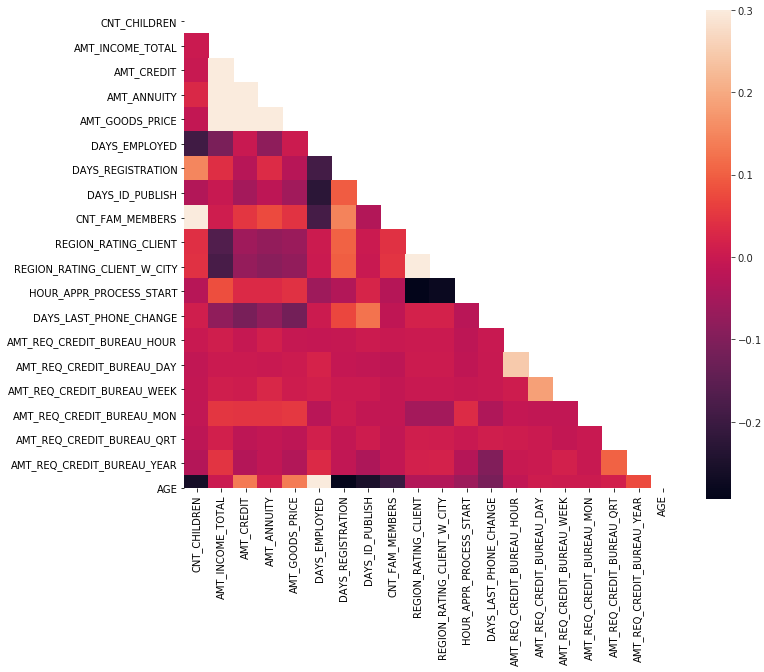

In [319]:
# Correlation Heat Map  for Target==1 or Defaulters
import numpy as np
corr = train_1_corr
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);

In [320]:
# Corrrelation Values for Target==1 or Defaulters
correlation_1 = train_1_corr.abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1.drop_duplicates()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
print('Top 10 Corrrelation Values for Target=1  or Defaulters')
print(correlation_1.tail(10).sort_values(ascending=False))

Top 10 Corrrelation Values for Target=1  or Defaulters
AMT_GOODS_PRICE              AMT_CREDIT              0.982566
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN            0.884879
AMT_ANNUITY                  AMT_CREDIT              0.752183
                             AMT_GOODS_PRICE         0.752008
DAYS_EMPLOYED                AGE                     0.575401
AMT_ANNUITY                  AMT_INCOME_TOTAL        0.398216
AMT_INCOME_TOTAL             AMT_GOODS_PRICE         0.327235
AMT_CREDIT                   AMT_INCOME_TOTAL        0.325320
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT    0.293915
dtype: float64


# Bi-Variate Analysis of Numerical Variables for Target =0 and Target =1 

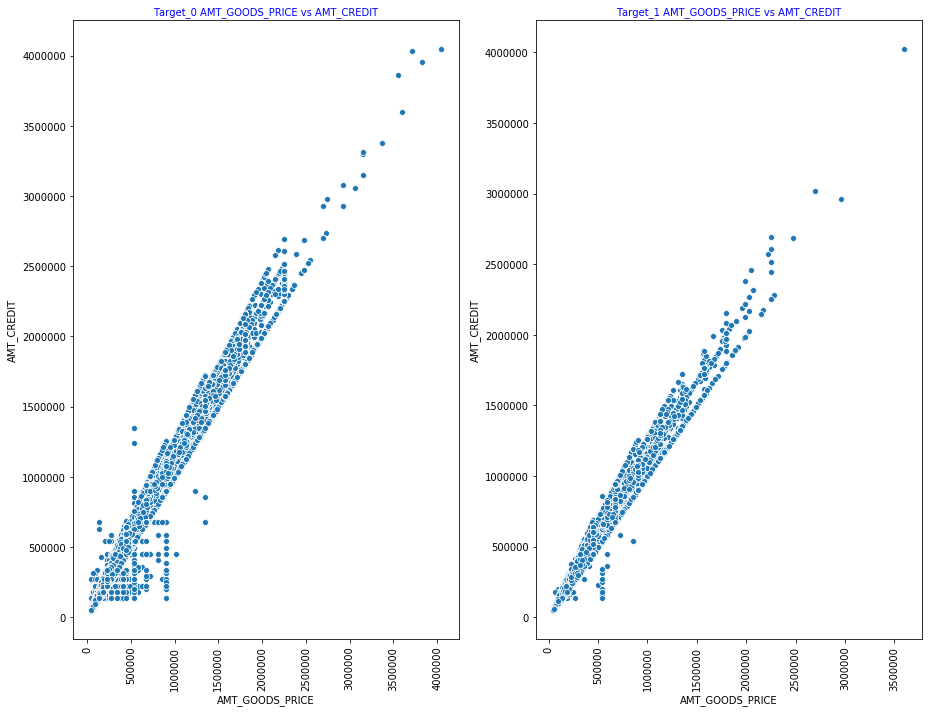

In [321]:
# Bivariate Analysis for 'AMT_CREDIT','AMT_GOODS_PRICE              '

fig = plt.figure(figsize=(13,10))

ax3 = plt.subplot(121)
sns.scatterplot(data=train_0,x='AMT_GOODS_PRICE',y='AMT_CREDIT', ax = ax3)
plt.xticks(rotation=90)
plt.title('Target_0 AMT_GOODS_PRICE vs AMT_CREDIT',fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Blue'})

ax4 = plt.subplot(122)
sns.scatterplot(data=train_1,x='AMT_GOODS_PRICE',y='AMT_CREDIT', ax = ax4)
plt.xticks(rotation=90)
plt.title('Target_1 AMT_GOODS_PRICE vs AMT_CREDIT',fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Blue'})

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.show()

### Inference : For an Applicant with Goods Price < 500000 and credit Amount < 500000 is less likely to have Payment Defaults as the Density is Very less.


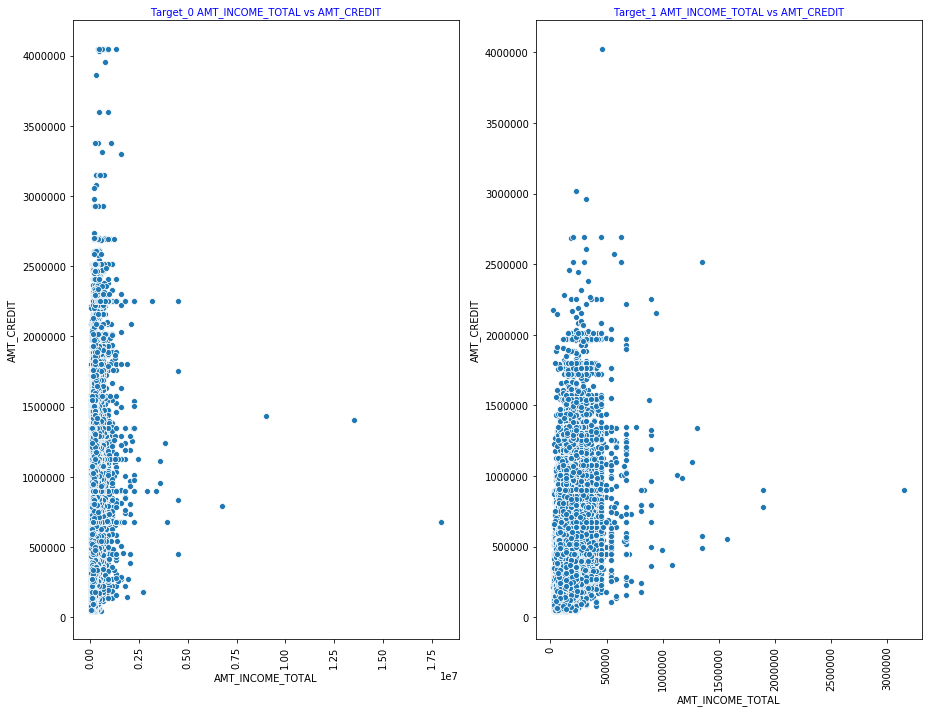

In [322]:
# Bivariate Analysis for 'AMT_CREDIT','AMT_INCOME_TOTAL                           '

fig = plt.figure(figsize=(13,10))

ax3 = plt.subplot(121)
sns.scatterplot(data=train_0,x='AMT_INCOME_TOTAL',y='AMT_CREDIT', ax = ax3)
plt.xticks(rotation=90)
plt.title('Target_0 AMT_INCOME_TOTAL vs AMT_CREDIT',fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Blue'})

ax4 = plt.subplot(122)
sns.scatterplot(data=train_1,x='AMT_INCOME_TOTAL',y='AMT_CREDIT', ax = ax4)
plt.xticks(rotation=90)
plt.title('Target_1 AMT_INCOME_TOTAL vs AMT_CREDIT',fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Blue'})

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.show()

### Inference For an Applicant with Income< 50000 amd credit Amount < 150000 is more like to have Payment Defaults as the Density is Very high 

# Merge Previous Application Data with Application Data 


In [323]:
#Loading Previous Application Data
Pre_df=pd.read_csv('./previous_application.csv')
Pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
Pre_df.shape

(1670214, 37)

In [325]:
percent_missing = Pre_df.isnull().sum() * 100 / len(Pre_df)
print(percent_missing[percent_missing>30])
Missing30percentcolumns=percent_missing[percent_missing>30].index.tolist()

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64


In [326]:
Pre_df.drop(Missing30percentcolumns,axis=1,inplace=True)
Pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


## There are Duplicate Values for SK_ID_CURR as a person could have taken loan Multiple Times 
 

In [327]:
#Since the Previous application data is very large, we are deleting some rows so that it could be easily merged
Pre_df=Pre_df.loc[0:50000]

In [328]:
Pre_df.SK_ID_CURR.value_counts()

163142    6
345256    6
404929    6
326092    5
341981    5
         ..
243106    1
316455    1
286111    1
152990    1
393216    1
Name: SK_ID_CURR, Length: 44472, dtype: int64

In [329]:
Merge_train=df1.merge(Pre_df,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')

In [330]:
Merge_train.shape

(42385, 73)

In [331]:
Merge_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Repeater,XNA,Cash,walk-in,Regional / Local,1200,Consumer electronics,18.0,high,Cash Street: high
1,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164,Consumer electronics,12.0,low_action,POS household without interest
2,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,New,Audio/Video,POS,XNA,Country-wide,42,Connectivity,12.0,high,POS mobile with interest
3,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,New,Computers,POS,XNA,Country-wide,200,Consumer electronics,6.0,low_normal,POS household without interest
4,100027,0,Cash loans,F,N,Y,0,83250.0,239850.0,23850.0,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),5,XNA,12.0,low_normal,Cash X-Sell: low


In [332]:
Merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42385 entries, 0 to 42384
Data columns (total 73 columns):
SK_ID_CURR                      42385 non-null int64
TARGET                          42385 non-null int64
NAME_CONTRACT_TYPE_x            42385 non-null object
CODE_GENDER                     42385 non-null object
FLAG_OWN_CAR                    42385 non-null object
FLAG_OWN_REALTY                 42385 non-null object
CNT_CHILDREN                    42385 non-null int64
AMT_INCOME_TOTAL                42385 non-null float64
AMT_CREDIT_x                    42385 non-null float64
AMT_ANNUITY_x                   42385 non-null float64
AMT_GOODS_PRICE_x               42385 non-null float64
NAME_TYPE_SUITE                 42385 non-null object
NAME_INCOME_TYPE                42385 non-null object
NAME_EDUCATION_TYPE             42385 non-null object
NAME_FAMILY_STATUS              42385 non-null object
NAME_HOUSING_TYPE               42385 non-null object
DAYS_EMPLOYED             

In [333]:
missing_counts = Merge_train.isnull().sum()
missing_counts[missing_counts!=0].sort_values(ascending=False)

AMT_GOODS_PRICE_y      8906
CNT_PAYMENT            8750
AMT_ANNUITY_y          8750
PRODUCT_COMBINATION       7
dtype: int64

In [334]:
percent_missing = Merge_train.isnull().sum() * 100 / len(Merge_train)
percent_missing[percent_missing!=0].sort_values(ascending=False)

AMT_GOODS_PRICE_y      21.012151
CNT_PAYMENT            20.644096
AMT_ANNUITY_y          20.644096
PRODUCT_COMBINATION     0.016515
dtype: float64

Analaysis for Column Name  AMT_GOODS_PRICE_y
NUll Value Count 8906
Describe
 count    3.347900e+04
mean     2.142154e+05
std      3.034711e+05
min      0.000000e+00
25%      4.892850e+04
50%      1.034505e+05
75%      2.250000e+05
max      3.150000e+06
Name: AMT_GOODS_PRICE_y, dtype: float64


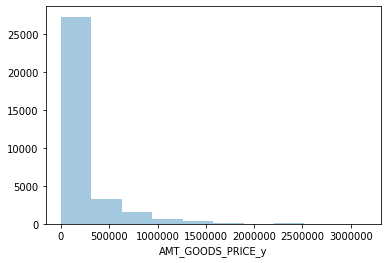

In [335]:
Numerical_analysis(Merge_train,'AMT_GOODS_PRICE_y',10)

Analaysis for Column Name  AMT_GOODS_PRICE_y
NUll Value Count 0
Describe
 count    4.238500e+04
mean     2.142154e+05
std      2.697094e+05
min      0.000000e+00
25%      6.264000e+04
50%      1.440000e+05
75%      2.142154e+05
max      3.150000e+06
Name: AMT_GOODS_PRICE_y, dtype: float64


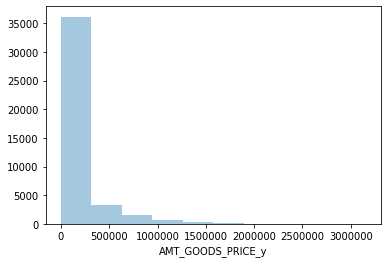

In [336]:
# imputing  the missing values for AMT_GOODS_PRICE_y with Mean of the distribution
Merge_train['AMT_GOODS_PRICE_y'].fillna(Merge_train['AMT_GOODS_PRICE_y'].mean(),inplace=True)
Numerical_analysis(Merge_train,'AMT_GOODS_PRICE_y',10)

Analaysis for Column Name  CNT_PAYMENT
NUll Value Count 8750
Mode  0    12.0
dtype: float64
Value Counts
 12.0    8520
6.0     5046
10.0    4034
24.0    3696
0.0     3508
18.0    1995
36.0    1673
60.0    1250
48.0    1078
8.0      815
4.0      752
30.0     386
14.0     200
42.0     168
16.0     159
5.0      106
54.0      53
9.0       37
7.0       36
20.0      36
3.0       34
15.0      28
11.0      18
17.0       2
26.0       1
22.0       1
13.0       1
38.0       1
23.0       1
Name: CNT_PAYMENT, dtype: int64


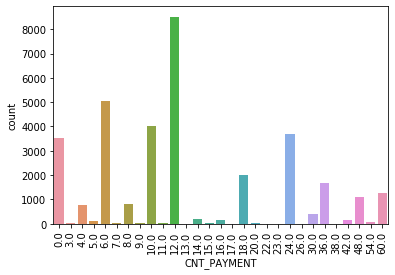

In [337]:
Categorical_analysis(Merge_train,'CNT_PAYMENT')

Analaysis for Column Name  CNT_PAYMENT
NUll Value Count 0
Mode  0    12.0
dtype: float64
Value Counts
 12.0    17270
6.0      5046
10.0     4034
24.0     3696
0.0      3508
18.0     1995
36.0     1673
60.0     1250
48.0     1078
8.0       815
4.0       752
30.0      386
14.0      200
42.0      168
16.0      159
5.0       106
54.0       53
9.0        37
7.0        36
20.0       36
3.0        34
15.0       28
11.0       18
17.0        2
26.0        1
22.0        1
13.0        1
38.0        1
23.0        1
Name: CNT_PAYMENT, dtype: int64


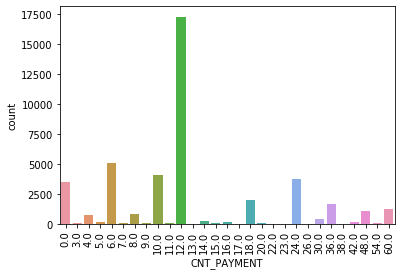

In [338]:
# imputing  the missing values for CNT_PAYMENT  with Mean of the distribution
Merge_train['CNT_PAYMENT'].fillna(Merge_train['CNT_PAYMENT'].mode()[0],inplace=True)
Categorical_analysis(Merge_train,'CNT_PAYMENT')

Analaysis for Column Name  AMT_ANNUITY_y
NUll Value Count 8750
Describe
 count     33635.000000
mean      15399.121287
std       14553.090466
min           0.000000
25%        6072.840000
50%       10790.280000
75%       19495.170000
max      234478.395000
Name: AMT_ANNUITY_y, dtype: float64


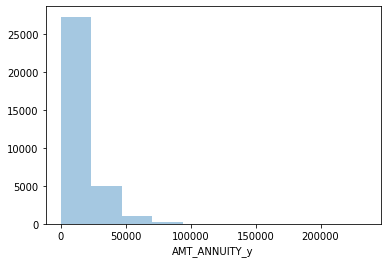

In [339]:
Numerical_analysis(Merge_train,'AMT_ANNUITY_y',10)

Analaysis for Column Name  AMT_ANNUITY_y
NUll Value Count 0
Describe
 count     42385.000000
mean      15399.121287
std       12964.134214
min           0.000000
25%        7079.130000
50%       14194.485000
75%       16214.265000
max      234478.395000
Name: AMT_ANNUITY_y, dtype: float64


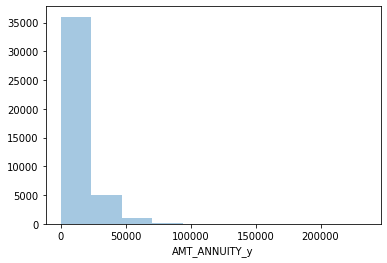

In [340]:
# imputing  the missing values for AMT_GOODS_PRICE_y with Mean of the distribution
Merge_train['AMT_ANNUITY_y'].fillna(Merge_train['AMT_ANNUITY_y'].mean(),inplace=True)
Numerical_analysis(Merge_train,'AMT_ANNUITY_y',10)

Analaysis for Column Name  PRODUCT_COMBINATION
NUll Value Count 7
Mode  0    POS household with interest
dtype: object
Value Counts
 POS household with interest       7300
Cash                              6525
POS mobile with interest          6104
Cash X-Sell: middle               3285
Cash X-Sell: low                  3026
Card Street                       2793
POS industry with interest        2750
POS household without interest    2406
Card X-Sell                       1879
Cash Street: high                 1528
Cash X-Sell: high                 1408
Cash Street: low                   897
Cash Street: middle                824
POS other with interest            630
POS mobile without interest        616
POS industry without interest      331
POS others without interest         76
Name: PRODUCT_COMBINATION, dtype: int64


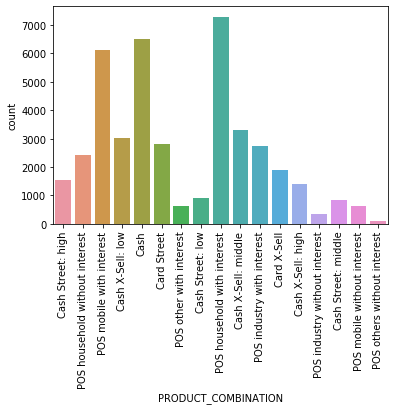

In [341]:
Categorical_analysis(Merge_train,'PRODUCT_COMBINATION')

Analaysis for Column Name  PRODUCT_COMBINATION
NUll Value Count 0
Mode  0    POS household with interest
dtype: object
Value Counts
 POS household with interest       7307
Cash                              6525
POS mobile with interest          6104
Cash X-Sell: middle               3285
Cash X-Sell: low                  3026
Card Street                       2793
POS industry with interest        2750
POS household without interest    2406
Card X-Sell                       1879
Cash Street: high                 1528
Cash X-Sell: high                 1408
Cash Street: low                   897
Cash Street: middle                824
POS other with interest            630
POS mobile without interest        616
POS industry without interest      331
POS others without interest         76
Name: PRODUCT_COMBINATION, dtype: int64


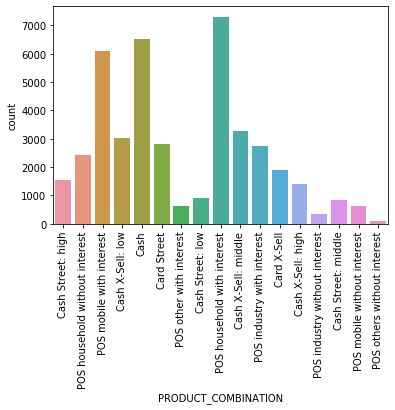

In [342]:
# imputing  the missing values for CNT_PAYMENT  with Mean of the distribution
Merge_train['PRODUCT_COMBINATION'].fillna(Merge_train['PRODUCT_COMBINATION'].mode()[0],inplace=True)
Categorical_analysis(Merge_train,'PRODUCT_COMBINATION')

## Segregating the datasets on Target=0 and Target =1 

In [343]:
ptrain_0 = previous_train.loc[previous_train['TARGET'] == 0]
ptrain_1 = previous_train.loc[previous_train['TARGET'] == 1]

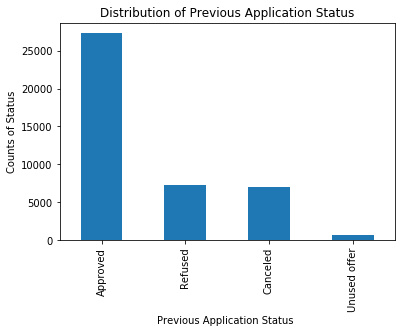

In [344]:
Merge_train.NAME_CONTRACT_STATUS.value_counts().plot.bar()
plt.xlabel("Previous Application Status ")
plt.ylabel("Counts of Status")
plt.title("Distribution of Previous Application Status")
plt.show()


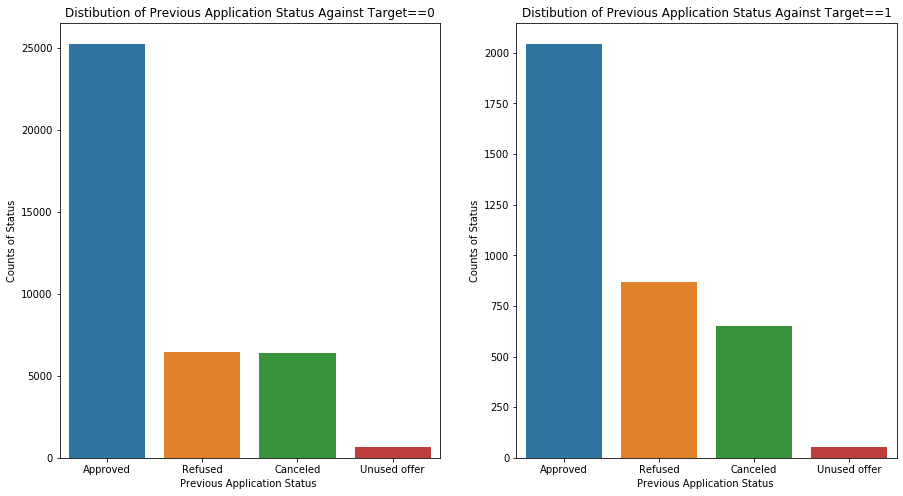

In [349]:
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
ax1=sns.countplot(x= 'NAME_CONTRACT_STATUS',data=ptrain_0)  
ax1.set(title='Distibution of Previous Application Status Against Target==0')
plt.xlabel("Previous Application Status ")
plt.ylabel("Counts of Status")
plt.subplot(1,2,2)
ax2=sns.countplot(x= 'NAME_CONTRACT_STATUS',data=ptrain_1)  
plt.xlabel("Previous Application Status ")
plt.ylabel("Counts of Status")
ax2.set(title='Distibution of Previous Application Status Against Target==1')
plt.show()

In [346]:
Merge_train[Merge_train.NAME_CONTRACT_STATUS=='Refused'].TARGET.value_counts(normalize=True)

0    0.881184
1    0.118816
Name: TARGET, dtype: float64

In [347]:
Merge_train[Merge_train.NAME_CONTRACT_STATUS=='Canceled'].TARGET.value_counts(normalize=True)

0    0.908061
1    0.091939
Name: TARGET, dtype: float64

In [348]:
Merge_train[Merge_train.NAME_CONTRACT_STATUS=='Approved'].TARGET.value_counts(normalize=True)

0    0.925078
1    0.074922
Name: TARGET, dtype: float64

### Inference: The Applicants whose Previous Application Status is Refused or Cancelled have high chance of Defaulting Again

# Overall Inferences 
In Lower income Group ,the percentage of Defaulters are High making them more risky to issue a Loan

Higher the Education lesser the Risk of Defaulting the Loan 

Male Applicants default more than Females. This puts giving loans to females is safer

Applicants who are single or not Married are more likely to Default a Loan.

Applicants of  Working class are highest defaulters .

Age Group of 20-40 have more people as Defaulters.

The Applicants whose Previous Application Status is Refused or Cancelled have high chance of Defaulting again.
